In [2]:
import pandas as pd

vf1 = pd.read_csv('data/Chartvf1.csv')
vf3 = pd.read_csv('data/Chartvf3.csv')
vf6 = pd.read_csv('data/Chartvf6.csv')
vf12 = pd.read_csv('data/Chartvf12.csv')

Tiền xử lý

In [3]:
print(vf1.head())
print(vf3.head())
print(vf6.head())
print(vf12.head())

   IMF1(t-1)  IMF1(t-2)  IMF1(t-3)  IMF2(t-1)  IMF2(t-2)  IMF2(t-3)  \
0  -0.232294  -0.227866  -0.225878  -0.224362  -0.189675  -0.171172   
1  -0.225878  -0.189675  -0.205371  -0.232294  -0.146520  -0.168744   
2  -0.205371  -0.146520  -0.171759  -0.225878  -0.100046   0.065845   
3  -0.171759  -0.100046  -0.126714  -0.205371  -0.051900   0.197043   
4  -0.126714  -0.051900  -0.072516  -0.171759  -0.003691   0.052113   

   IMF3(t-1)  IMF3(t-2)  IMF3(t-3)  IMF4(t-1)  ...  IMF9(t-1)  IMF9(t-2)  \
0  -0.146520  -0.131615  -0.123591  -0.058628  ...   0.054329   0.070846   
1  -0.100046  -0.123591  -0.058628   0.040777  ...   0.055964  -0.171172   
2  -0.051900  -0.058628   0.040777   0.129052  ...  -0.144051  -0.168744   
3  -0.003691   0.040777   0.129052   0.156779  ...   0.033246   0.065845   
4   0.043044   0.129052   0.156779   0.099842  ...   0.145207   0.197043   

   IMF9(t-3)  IMF10(t-1)  IMF10(t-2)  IMF10(t-3)  IMF11(t-1)  IMF11(t-2)  \
0   0.080344    0.085760    0.092323    

In [5]:
import numpy as np

print(vf1.shape)
print(vf3.shape)
print(vf6.shape)
print(vf12.shape)

(501, 34)
(499, 34)
(496, 34)
(490, 34)


In [6]:
print(vf1.info())
print(vf3.info())
print(vf6.info())
print(vf12.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   IMF1(t-1)   501 non-null    float64
 1   IMF1(t-2)   501 non-null    float64
 2   IMF1(t-3)   501 non-null    float64
 3   IMF2(t-1)   501 non-null    float64
 4   IMF2(t-2)   501 non-null    float64
 5   IMF2(t-3)   501 non-null    float64
 6   IMF3(t-1)   501 non-null    float64
 7   IMF3(t-2)   501 non-null    float64
 8   IMF3(t-3)   501 non-null    float64
 9   IMF4(t-1)   501 non-null    float64
 10  IMF4(t-2)   501 non-null    float64
 11  IMF4(t-3)   501 non-null    float64
 12  IMF5(t-1)   501 non-null    float64
 13  IMF5(t-2)   501 non-null    float64
 14  IMF5(t-3)   501 non-null    float64
 15  IMF6(t-1)   501 non-null    float64
 16  IMF6(t-2)   501 non-null    float64
 17  IMF6(t-3)   501 non-null    float64
 18  IMF7(t-1)   501 non-null    float64
 19  IMF7(t-2)   501 non-null    f

In [7]:
print(vf1.duplicated().sum())
print(vf3.duplicated().sum())
print(vf6.duplicated().sum())
print(vf12.duplicated().sum())

0
0
0
0


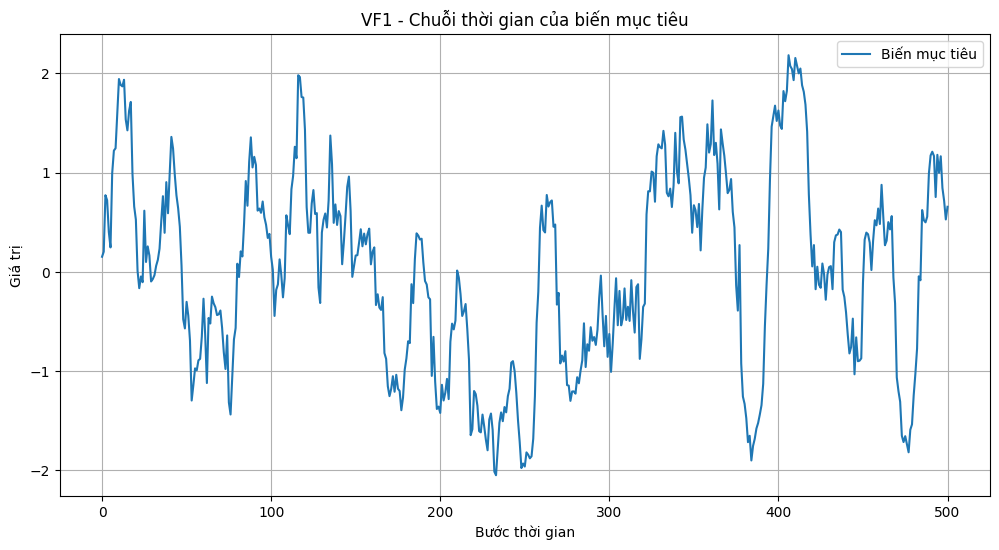

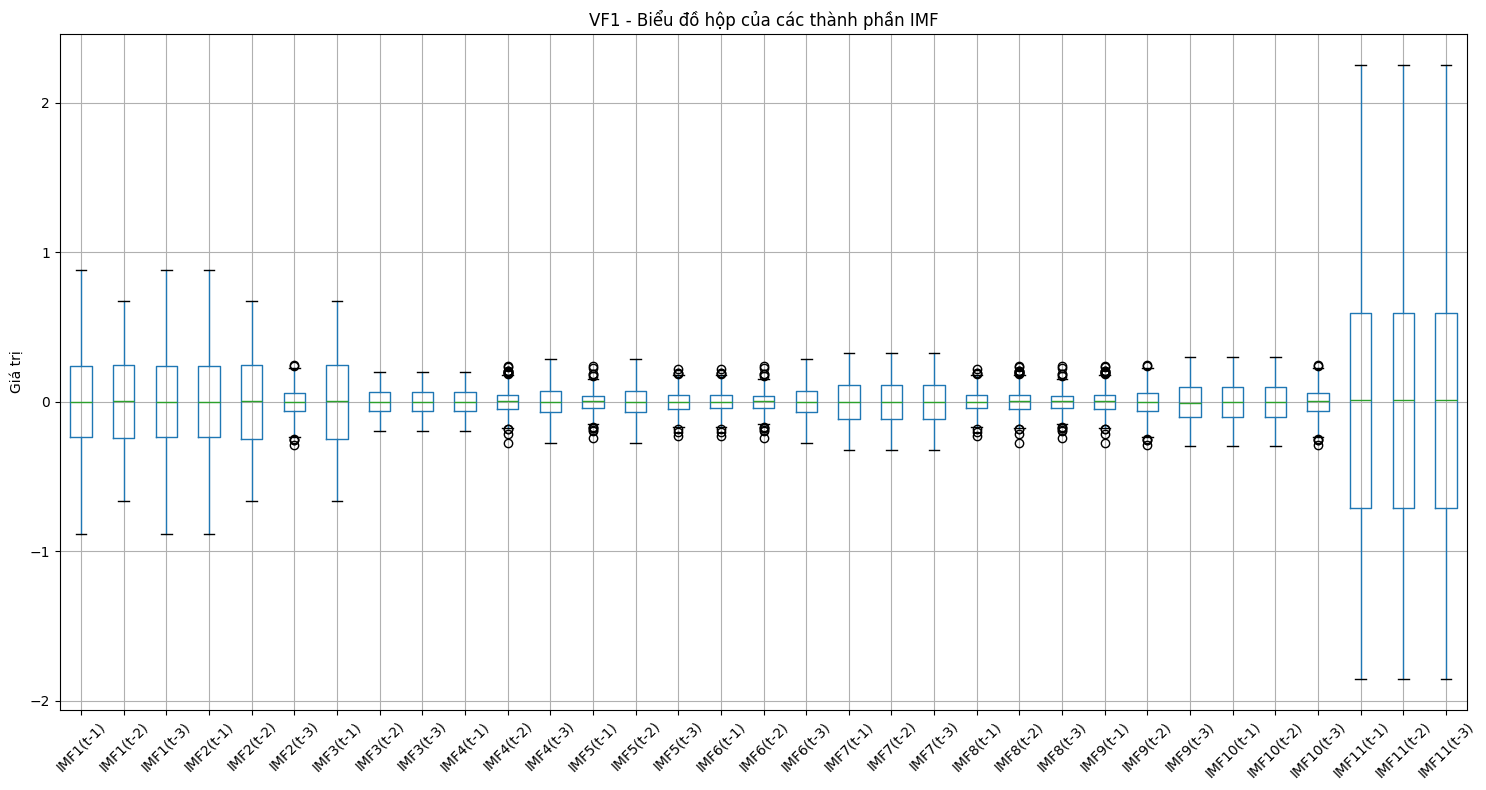

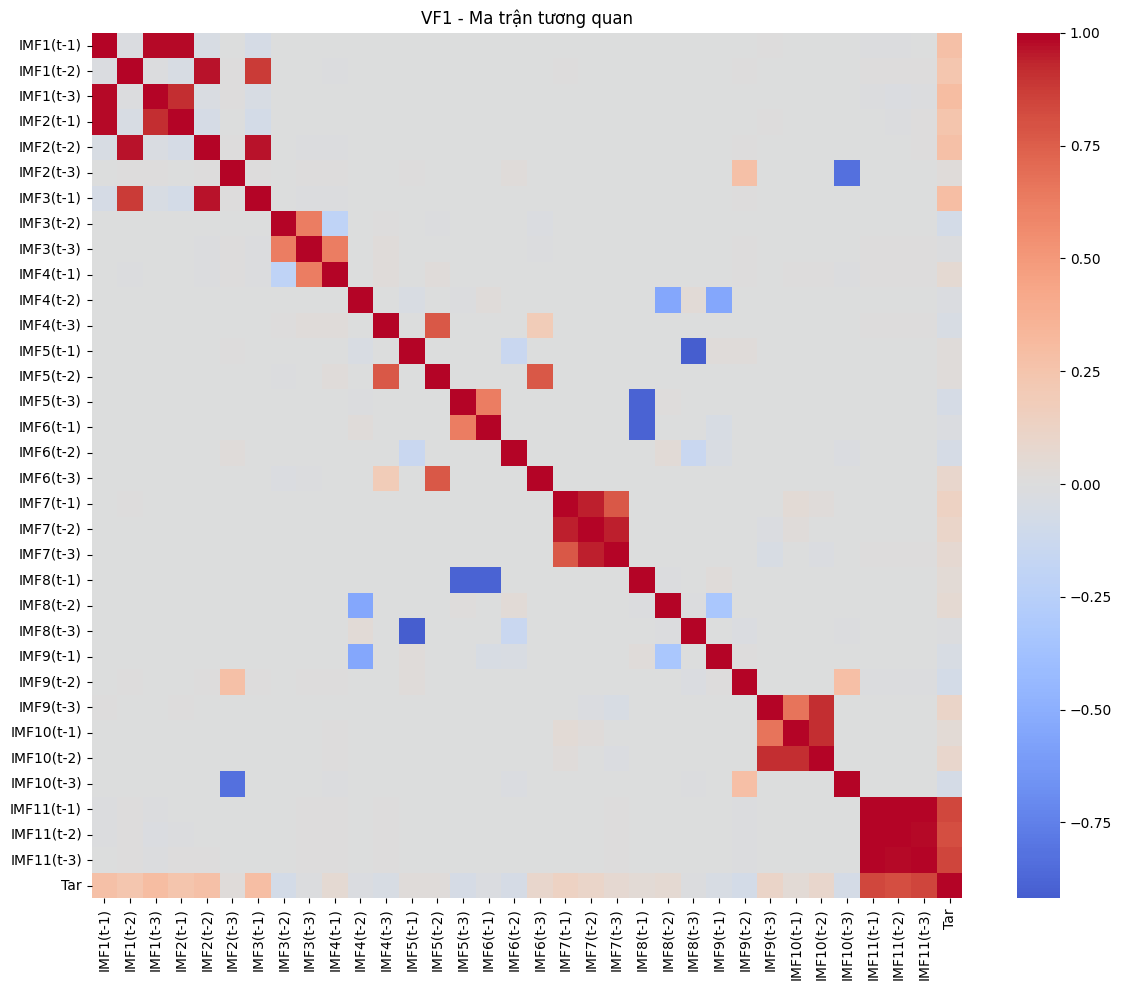

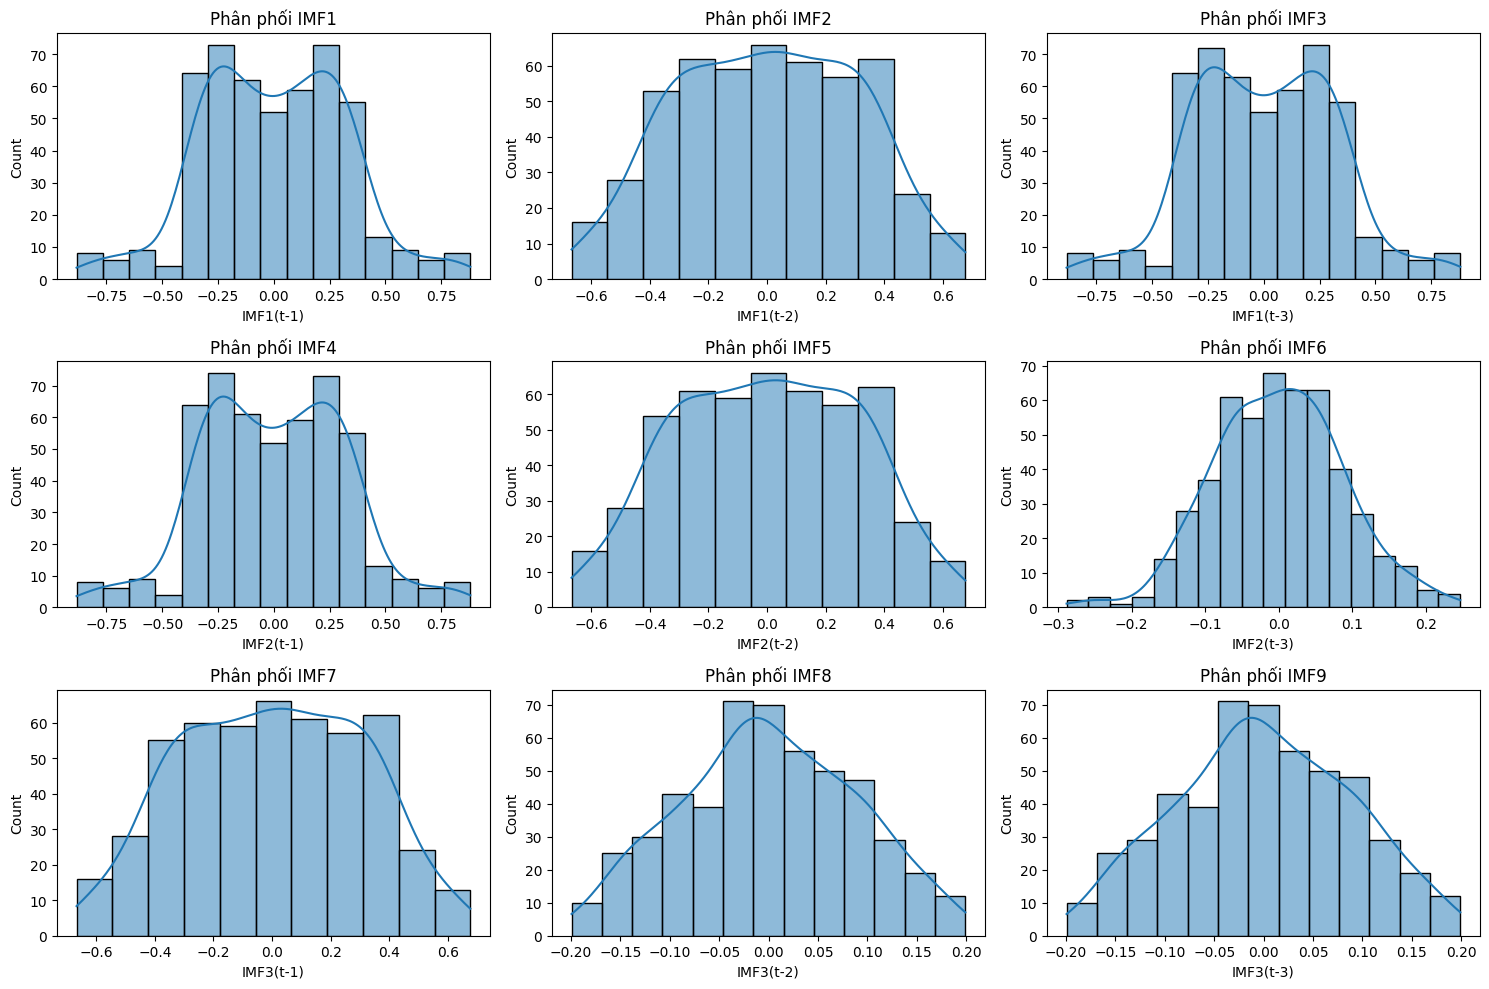

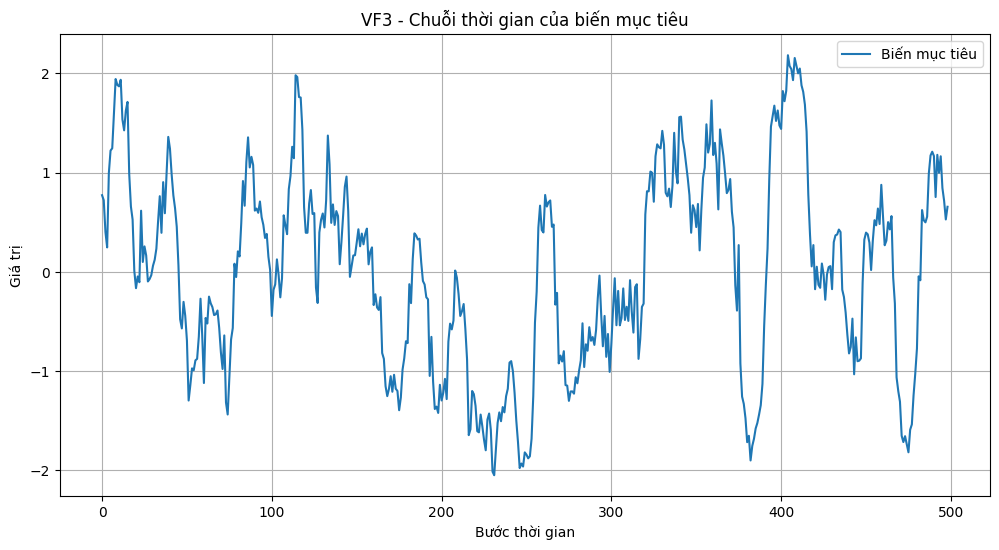

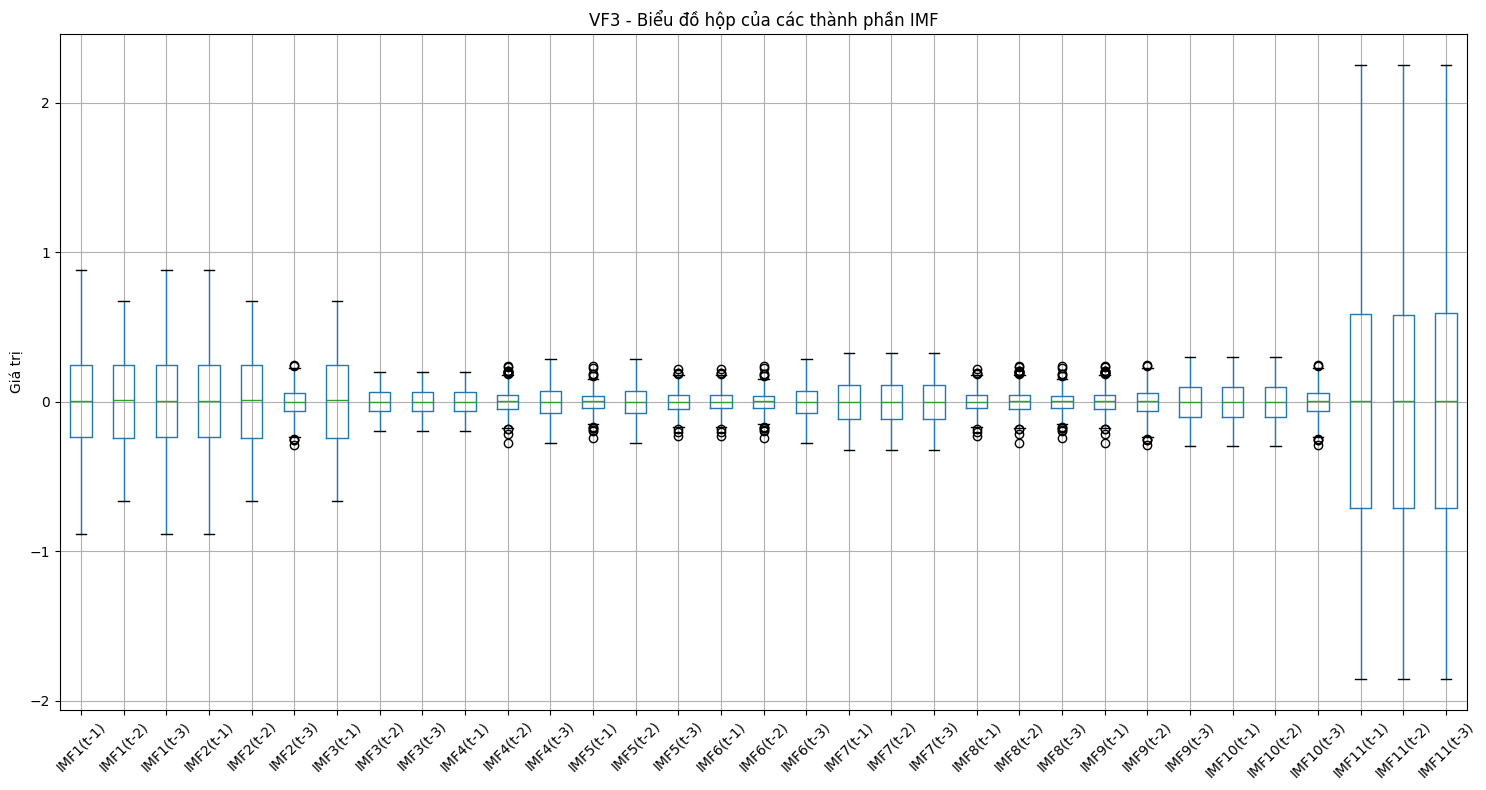

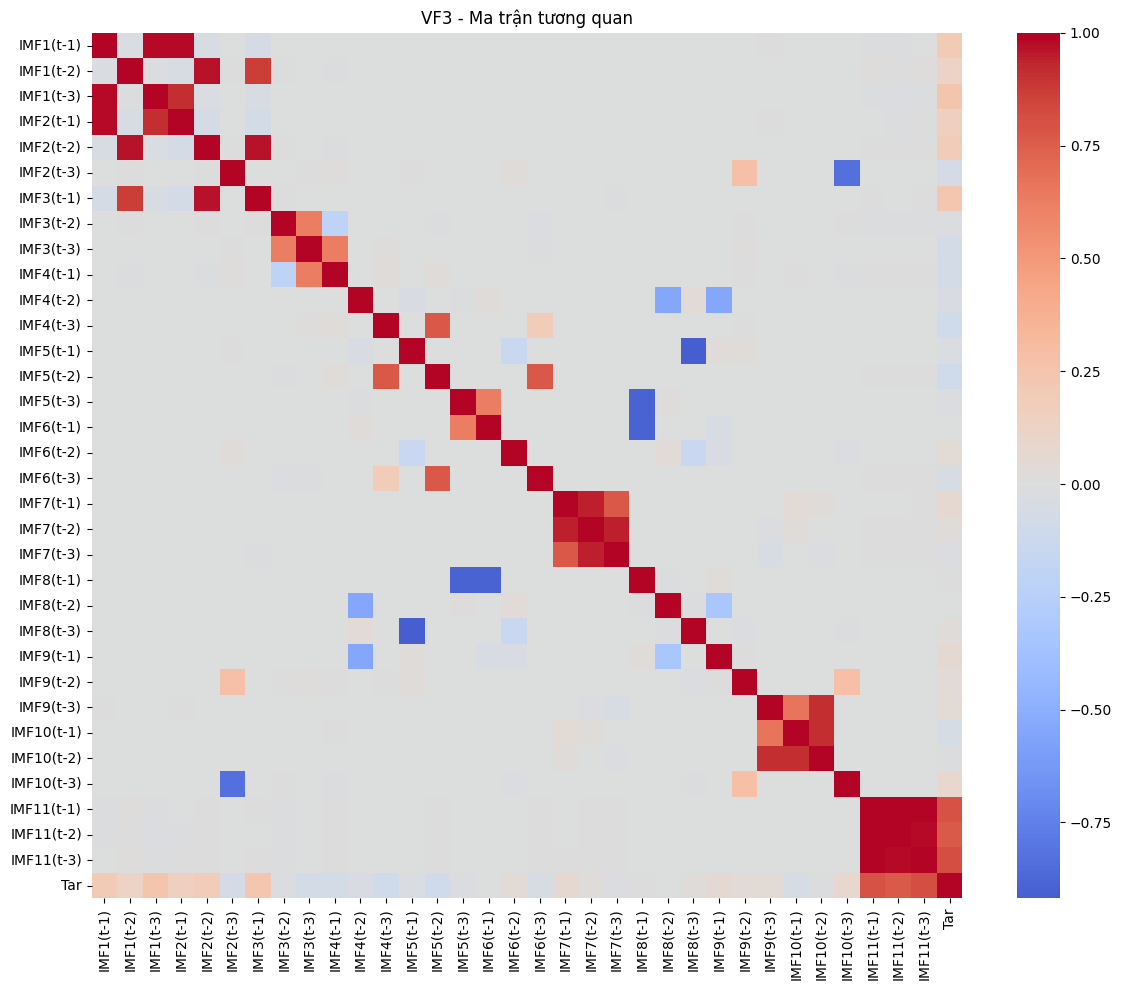

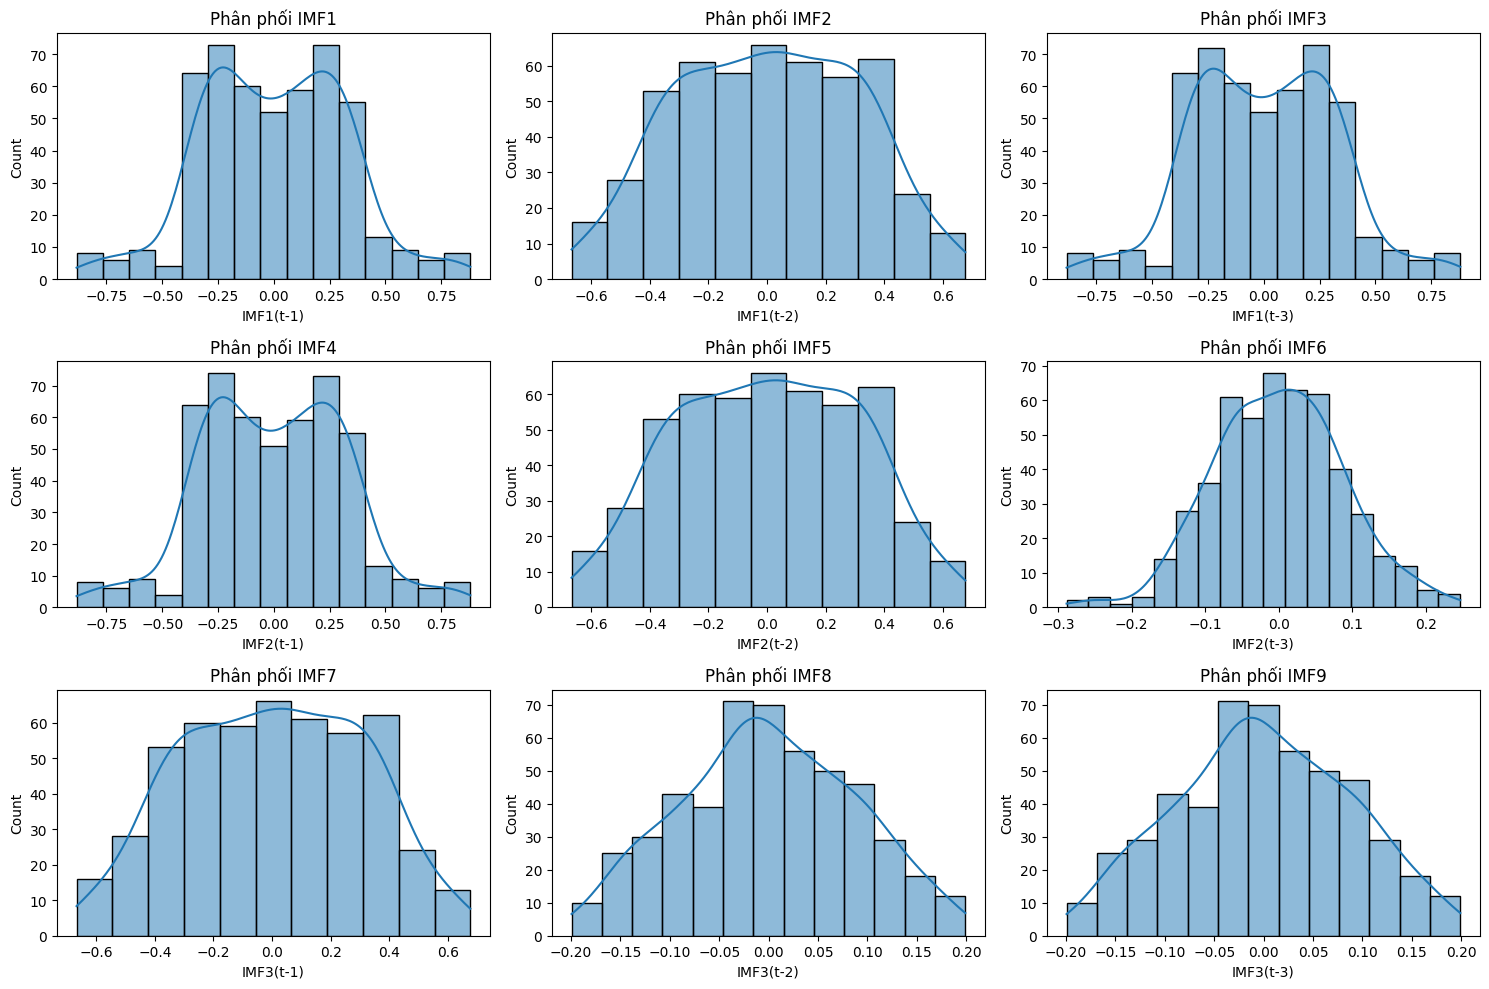

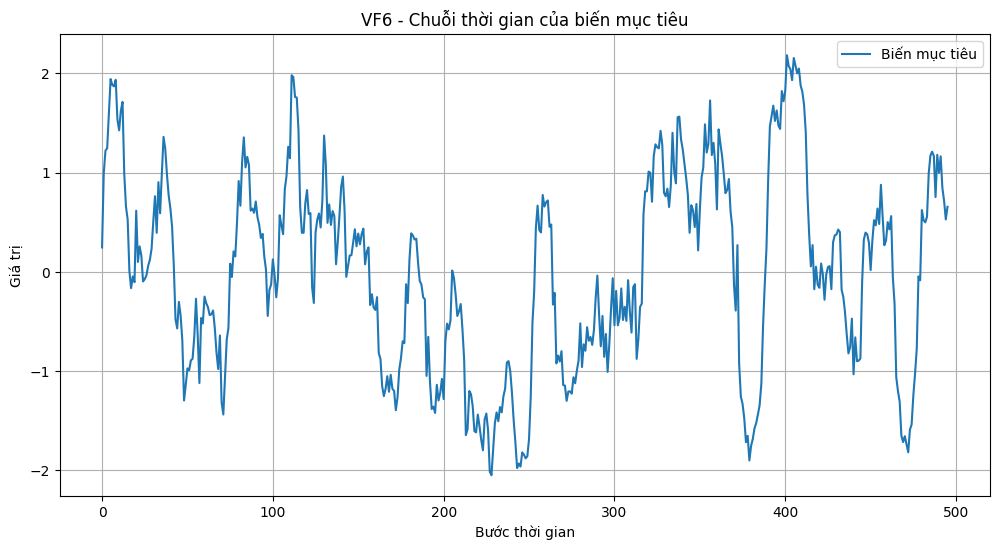

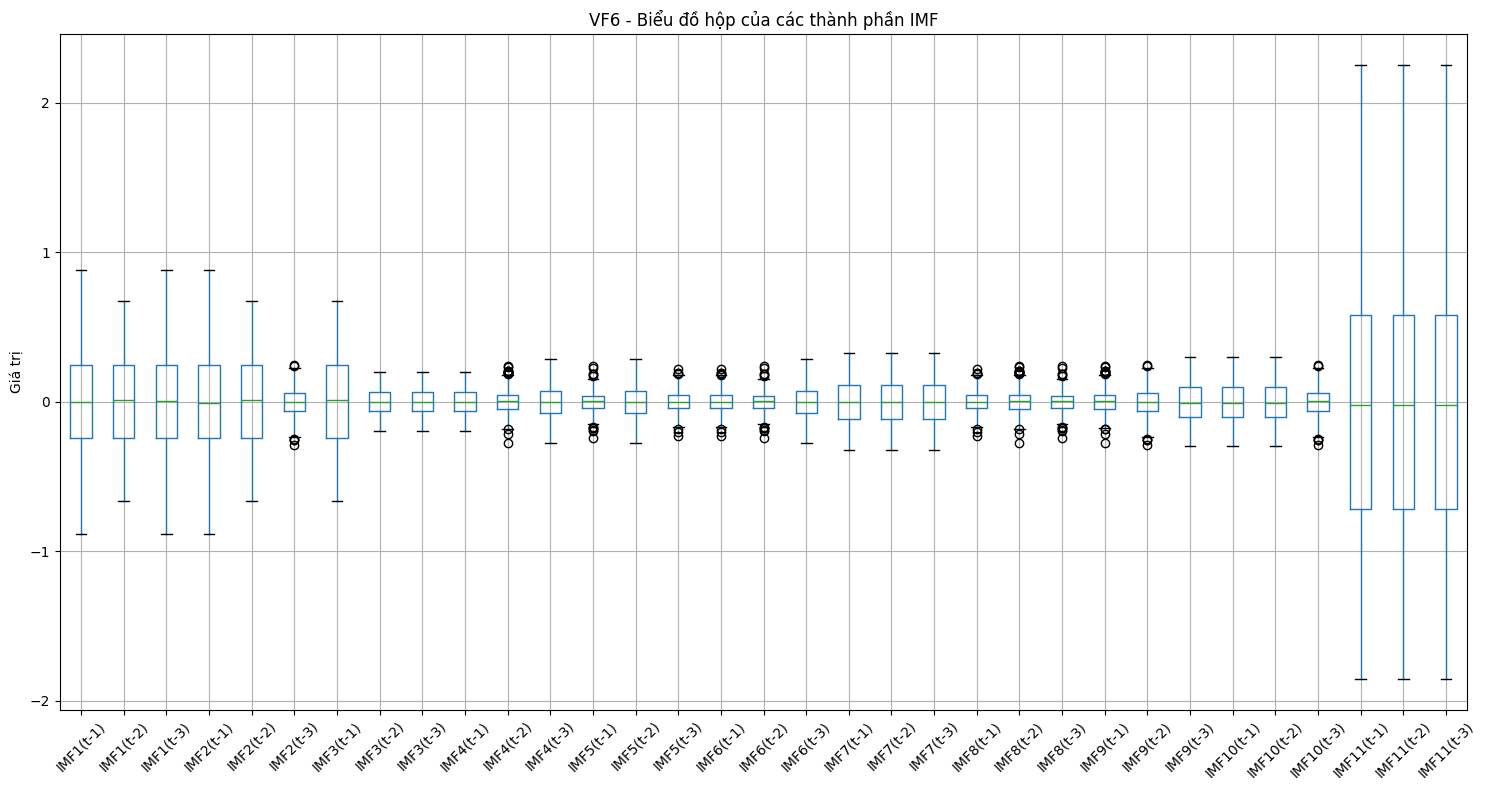

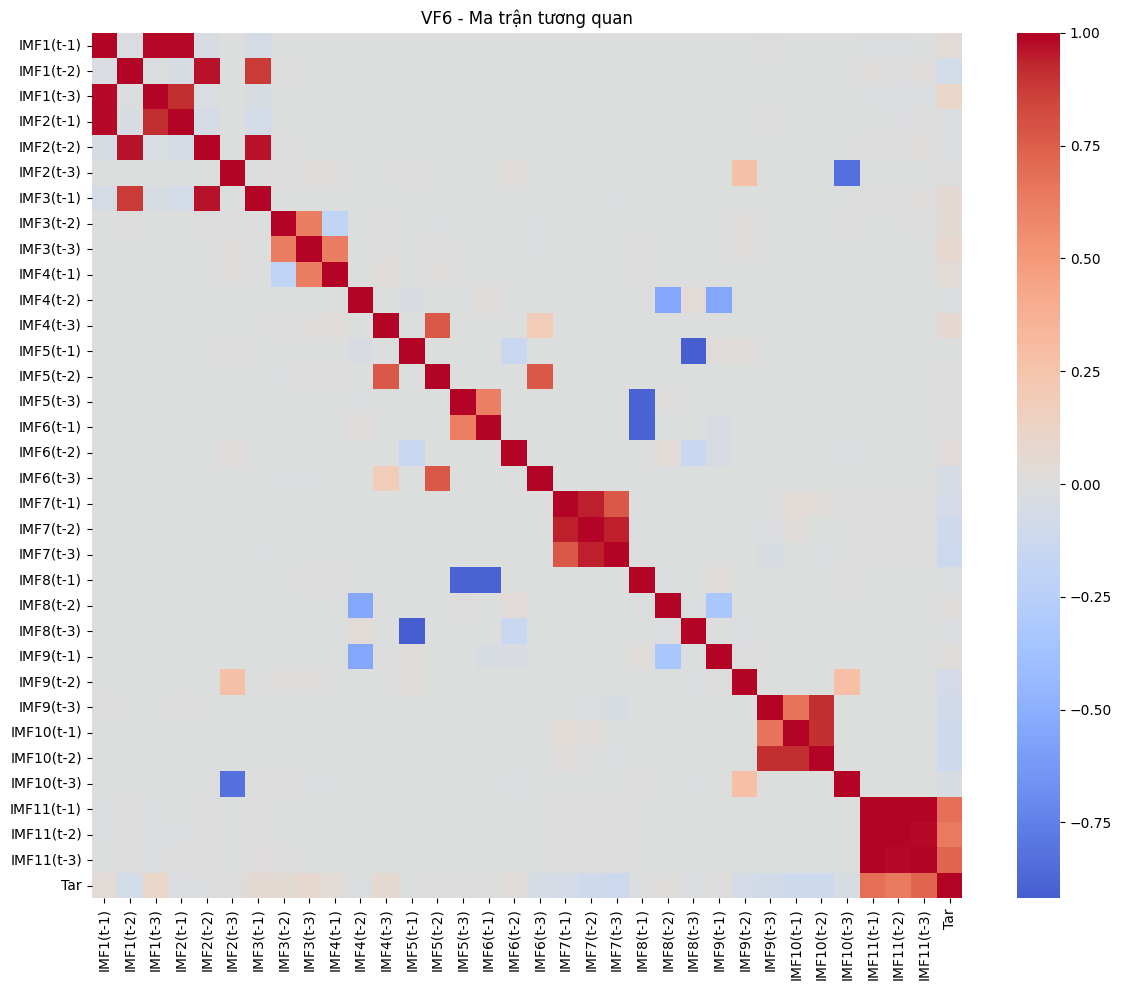

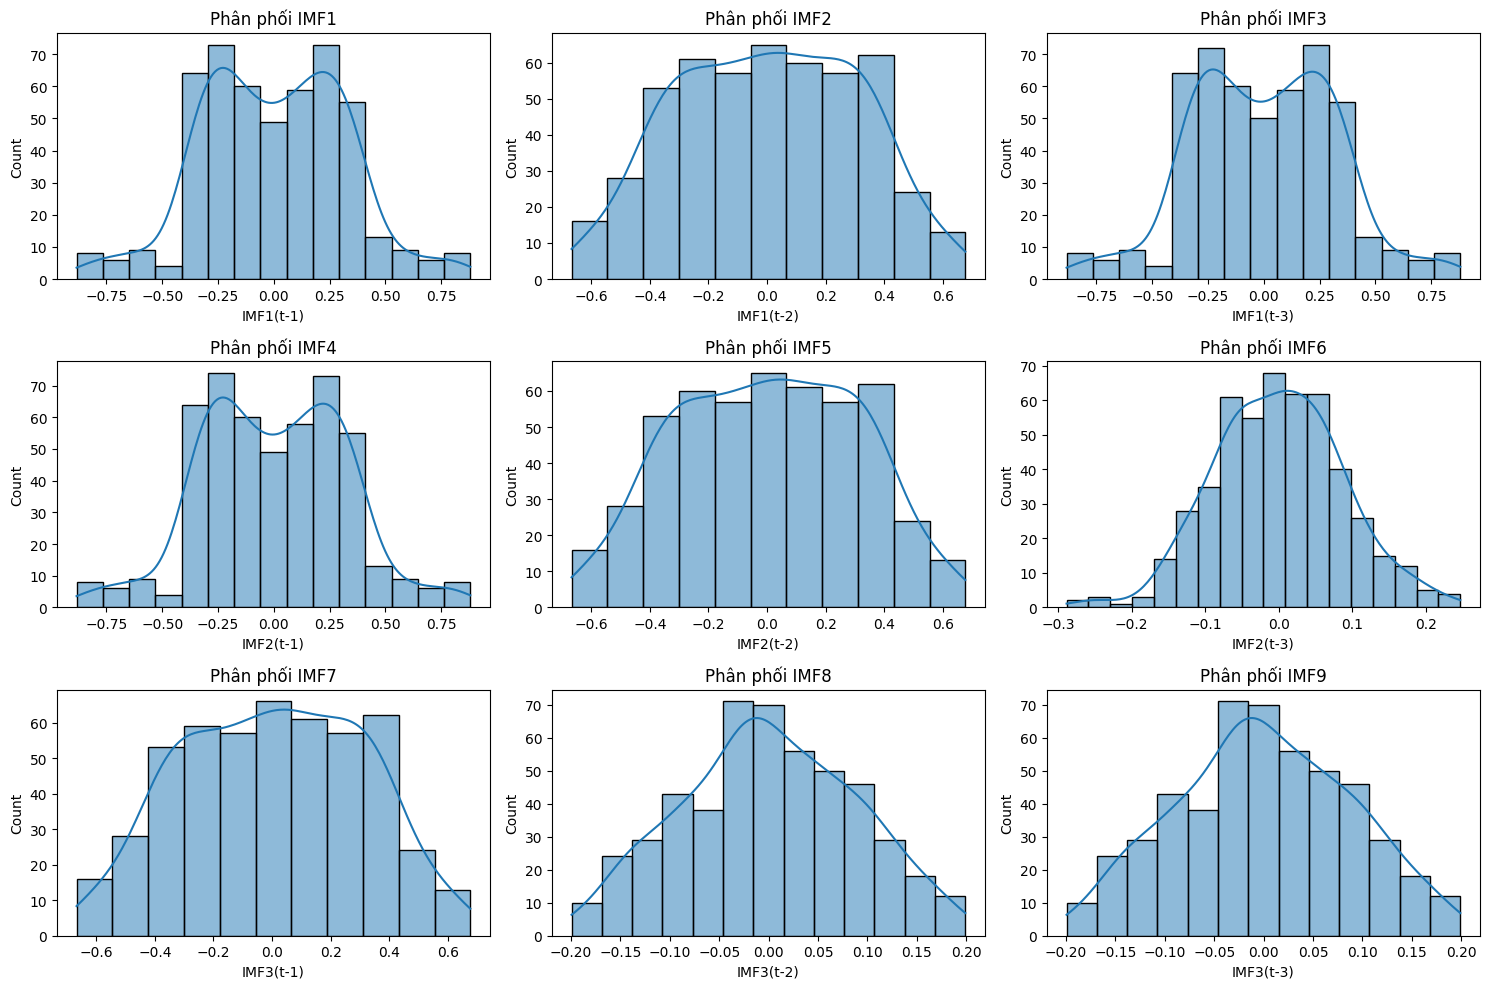

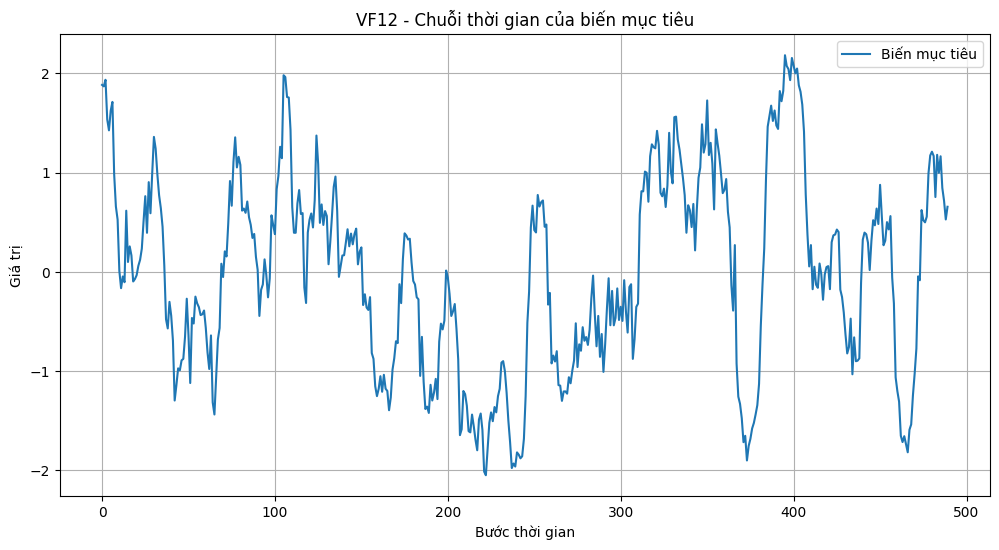

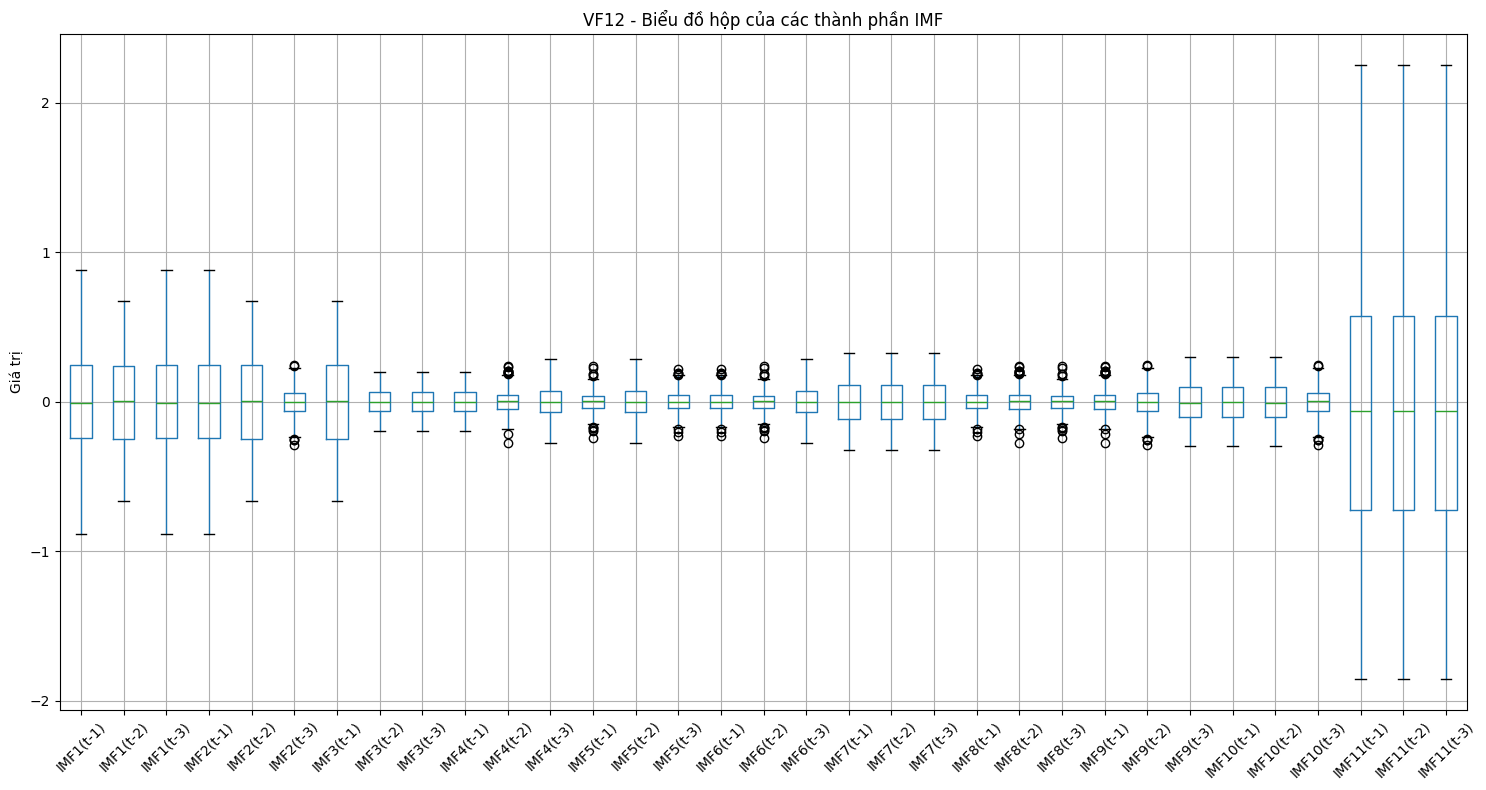

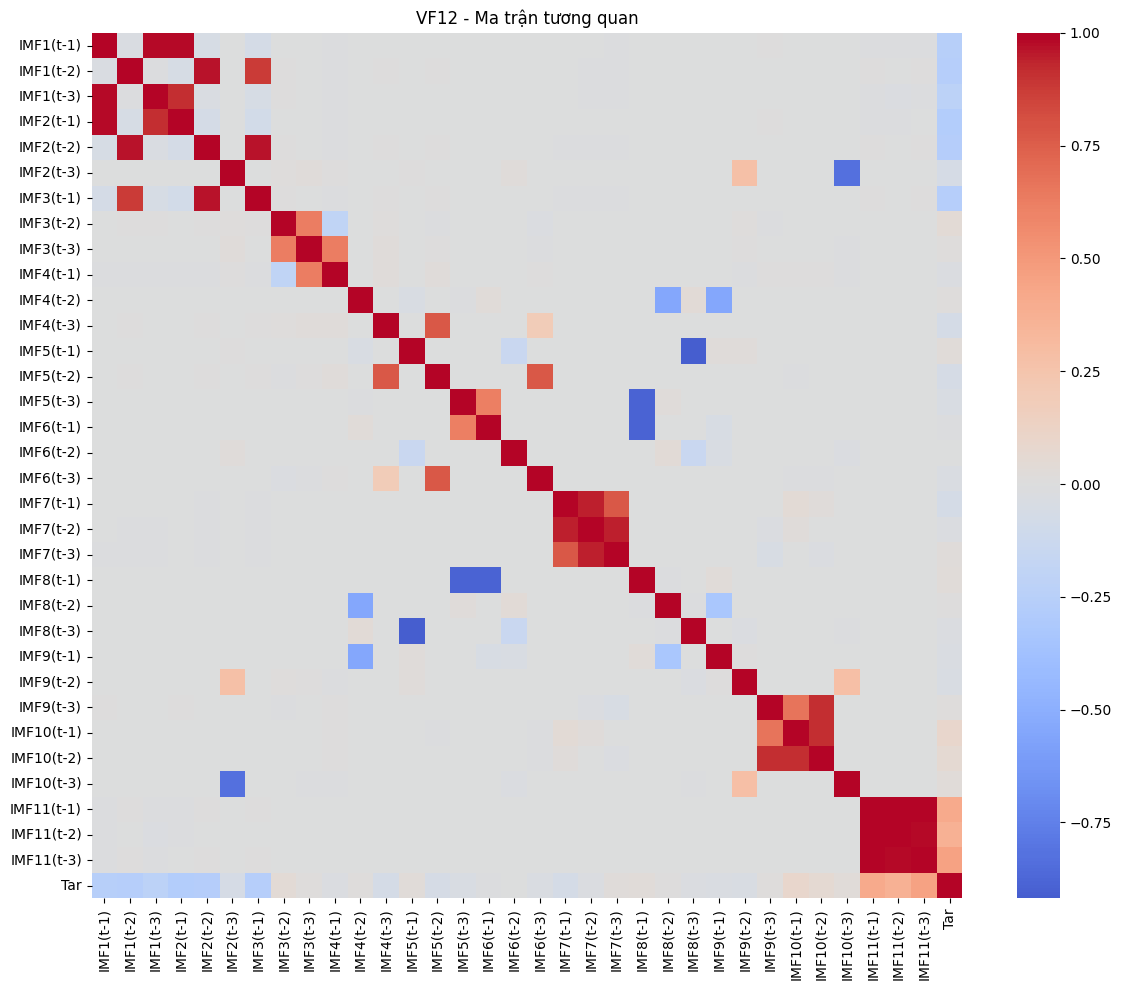

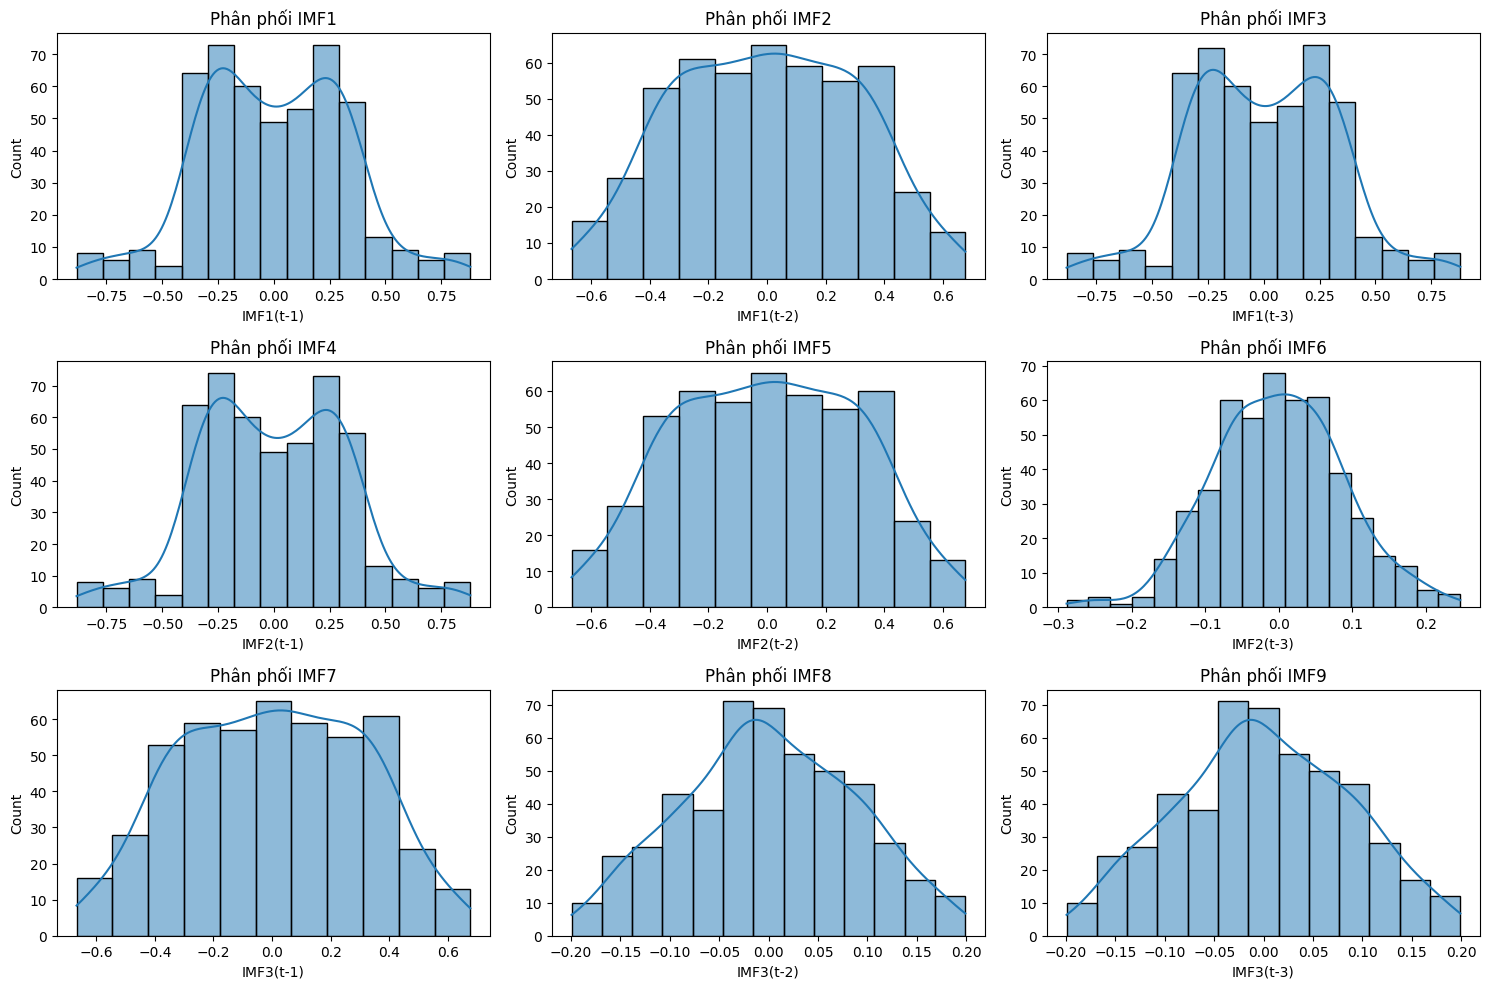

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
def tao_bieu_do(data, prefix):
    """Tạo và lưu các biểu đồ cho một bộ dữ liệu"""

    # 1. Biểu đồ chuỗi thời gian
    plt.figure(figsize=(12, 6))
    plt.plot(data['Tar'], label='Biến mục tiêu')
    plt.title(f'{prefix} - Chuỗi thời gian của biến mục tiêu')
    plt.xlabel('Bước thời gian')
    plt.ylabel('Giá trị')
    plt.legend()
    plt.grid(True)
    plt.show()
    plt.close()

    # 2. Biểu đồ hộp cho các thành phần IMF
    plt.figure(figsize=(15, 8))
    imf_columns = [col for col in data.columns if 'IMF' in col]
    data[imf_columns].boxplot()
    plt.title(f'{prefix} - Biểu đồ hộp của các thành phần IMF')
    plt.xticks(rotation=45)
    plt.ylabel('Giá trị')
    plt.tight_layout()
    plt.show()
    plt.close()

    # 3. Ma trận tương quan
    plt.figure(figsize=(12, 10))
    correlation = data.corr()
    sns.heatmap(correlation, annot=False, cmap='coolwarm', center=0)
    plt.title(f'{prefix} - Ma trận tương quan')
    plt.tight_layout()
    plt.show()
    plt.close()

    # 4. Phân phối các thành phần IMF
    plt.figure(figsize=(15, 10))
    for i in range(min(9, len(imf_columns))):
        plt.subplot(3, 3, i+1)
        sns.histplot(data[imf_columns[i]], kde=True)
        plt.title(f'Phân phối IMF{i+1}')
    plt.tight_layout()
    plt.show()
    plt.close()

# Tạo biểu đồ cho từng bộ dữ liệu
datasets = {
    'VF1': vf1,
    'VF3': vf3,
    'VF6': vf6,
    'VF12': vf12
}

for prefix, data in datasets.items():
    tao_bieu_do(data, prefix)

Tách bộ dữ liệu 

In [10]:
from sklearn.model_selection import train_test_split

def split_data(df):
    # Chia 80% Train, 20% Test
    X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=["Tar"]), df["Tar"], test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

# Chia từng bộ dữ liệu riêng biệt
X_train_vf1, X_test_vf1, y_train_vf1, y_test_vf1 = split_data(vf1)
X_train_vf3, X_test_vf3, y_train_vf3, y_test_vf3 = split_data(vf3)
X_train_vf6, X_test_vf6, y_train_vf6, y_test_vf6 = split_data(vf6)
X_train_vf12, X_test_vf12, y_train_vf12, y_test_vf12 = split_data(vf12)

# Kiểm tra kích thước từng tập
print("vf1 - Train:", X_train_vf1.shape, "Test:", X_test_vf1.shape)
print("vf3 - Train:", X_train_vf3.shape, "Test:", X_test_vf3.shape)
print("vf6 - Train:", X_train_vf6.shape, "Test:", X_test_vf6.shape)
print("vf12 - Train:", X_train_vf12.shape, "Test:", X_test_vf12.shape)

vf1 - Train: (400, 33) Test: (101, 33)
vf3 - Train: (399, 33) Test: (100, 33)
vf6 - Train: (396, 33) Test: (100, 33)
vf12 - Train: (392, 33) Test: (98, 33)


Dùng LSTM để dự báo cho 1 tháng

Epoch 1/150


d:\ff\.venv\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.9371 - val_loss: 0.6817
Epoch 2/150
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7942 - val_loss: 0.5422
Epoch 3/150
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5961 - val_loss: 0.3735
Epoch 4/150
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3972 - val_loss: 0.2292
Epoch 5/150
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2907 - val_loss: 0.1390
Epoch 6/150
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1610 - val_loss: 0.1084
Epoch 7/150
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1294 - val_loss: 0.1031
Epoch 8/150
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1172 - val_loss: 0.0993
Epoch 9/150
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0898 - val_loss: 0.0954
Epoch 10/150
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0826 - val_loss: 0.0897
Epoch 11/150
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0949 - val_loss: 0.0849
Epoch 12/150
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0761 - val_lo

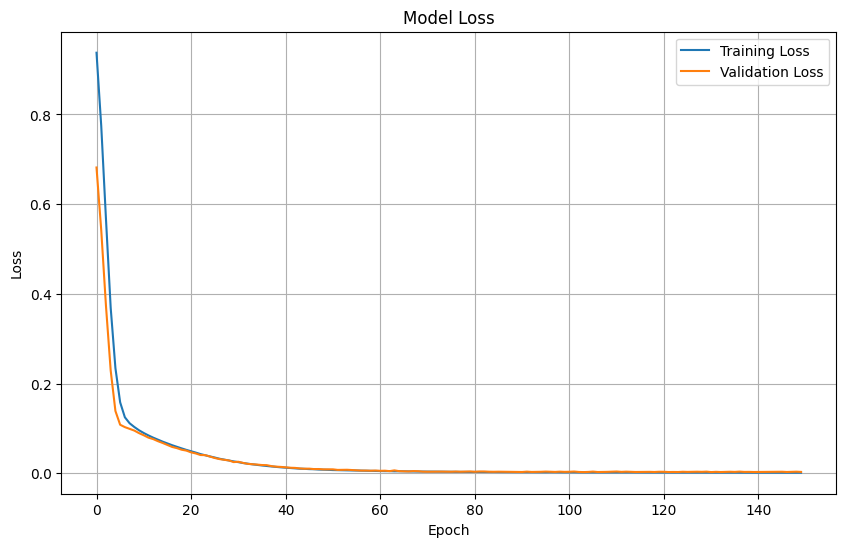

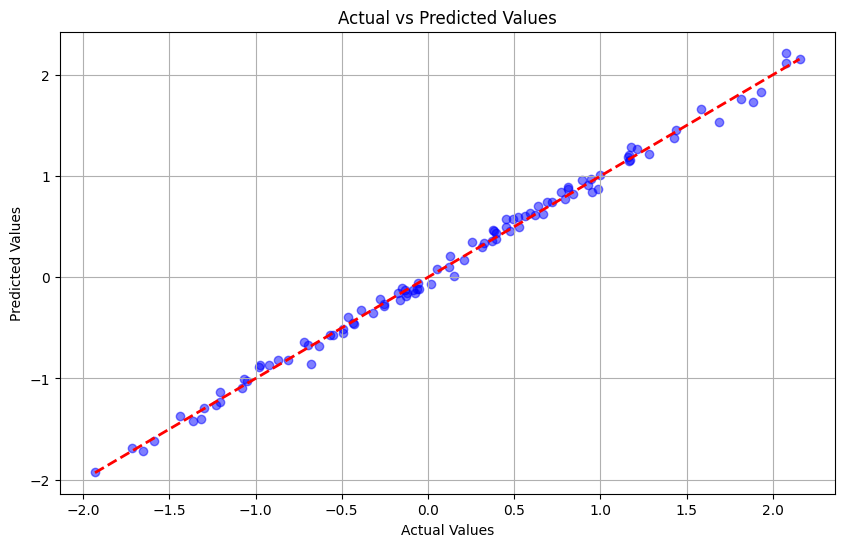

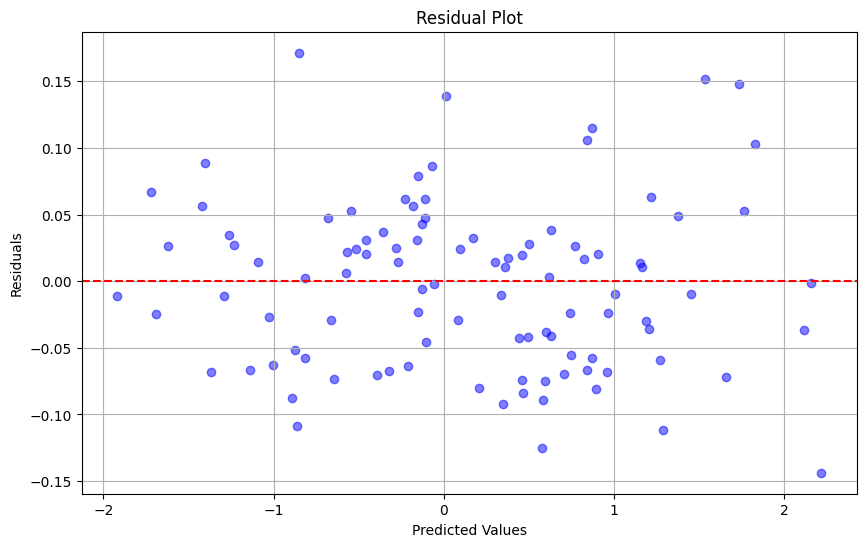

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam

# Load dữ liệu từ biến DataFrame đã chia trên Colab
X_train, X_test, y_train, y_test = X_train_vf1, X_test_vf1, y_train_vf1, y_test_vf1

# Reshape dữ liệu cho LSTM [samples, time steps, features]
X_train = X_train.values.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.values.reshape(X_test.shape[0], 1, X_test.shape[1])

# Hyperparameters
learning_rate = 0.0006
batch_size = 4
num_neurons = 12
epochs = 150

# Xây dựng mô hình LSTM
model = Sequential([
    LSTM(num_neurons, activation='relu', input_shape=(1, X_train.shape[2]), return_sequences=True),
    Dense(1)
])

# Dùng optimizer Adam
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='mse')

# Huấn luyện mô hình và hiển thị đầy đủ loss qua từng epoch
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                    validation_split=0.1, verbose=1)  # 🔥 HIỂN THỊ CHI TIẾT EPOCHS

# Dự đoán
train_pred = model.predict(X_train).flatten()
test_pred = model.predict(X_test).flatten()

# Tính toán các metrics
def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, mae, r2

train_metrics = calculate_metrics(y_train, train_pred)
test_metrics = calculate_metrics(y_test, test_pred)

print("\nTraining Metrics:")
print(f"MSE: {train_metrics[0]:.4f}, RMSE: {train_metrics[1]:.4f}, MAE: {train_metrics[2]:.4f}, R²: {train_metrics[3]:.4f}")
print("\nTest Metrics:")
print(f"MSE: {test_metrics[0]:.4f}, RMSE: {test_metrics[1]:.4f}, MAE: {test_metrics[2]:.4f}, R²: {test_metrics[3]:.4f}")

# Vẽ loss function
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Vẽ biểu đồ Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, test_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

# Vẽ biểu đồ Residuals
residuals = y_test - test_pred
plt.figure(figsize=(10, 6))
plt.scatter(test_pred, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

Dùng LSTM dự báo cho 3 tháng 

Epoch 1/150


d:\ff\.venv\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.9926 - val_loss: 0.6637
Epoch 2/150
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8678 - val_loss: 0.5338
Epoch 3/150
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6338 - val_loss: 0.3942
Epoch 4/150
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4545 - val_loss: 0.2996
Epoch 5/150
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3940 - val_loss: 0.2484
Epoch 6/150
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3624 - val_loss: 0.2291
Epoch 7/150
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3213 - val_loss: 0.2277
Epoch 8/150
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2495 - val_loss: 0.2257
Epoch 9/150
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2856 - val_loss: 0.2263
Epoch 10/150
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2433 - val_loss: 0.2236
Epoch 11/150
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2163 - val_loss: 0.2191
Epoch 12/150
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2207 - val_lo

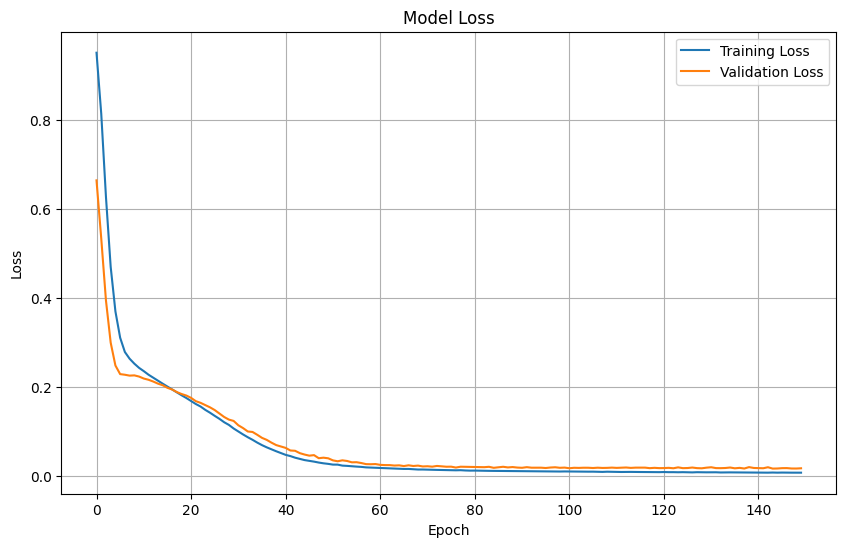

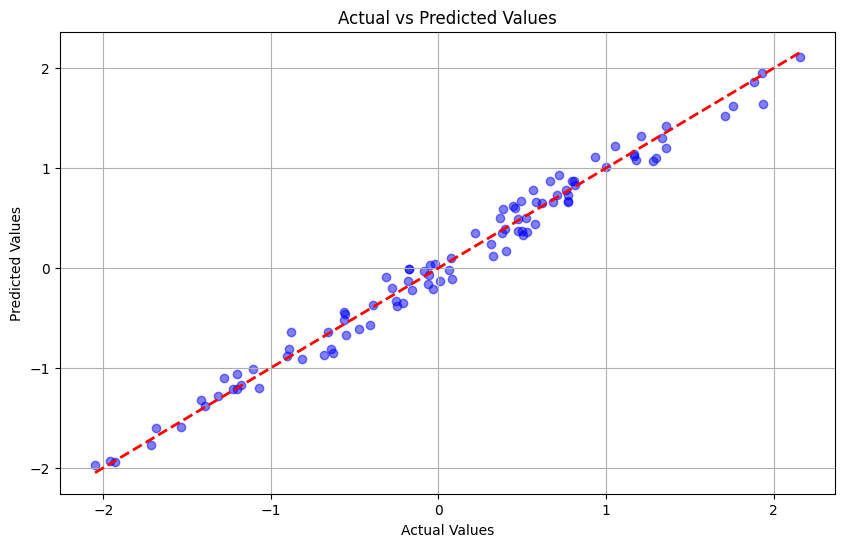

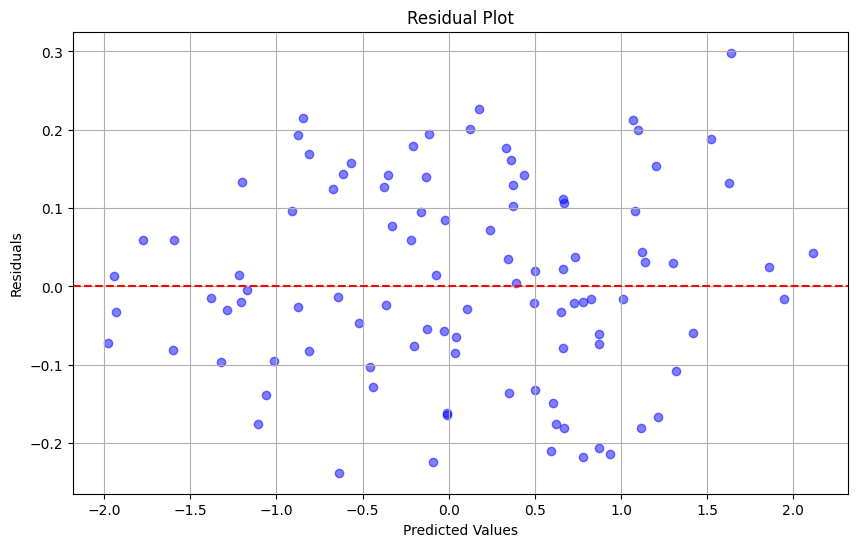

In [12]:
# 🔹 Load dữ liệu từ biến DataFrame đã chia trên Colab
X_train, X_test, y_train, y_test = X_train_vf3, X_test_vf3, y_train_vf3, y_test_vf3

# 🔹 Reshape dữ liệu cho LSTM [samples, time steps, features]
X_train = X_train.values.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.values.reshape(X_test.shape[0], 1, X_test.shape[1])

# 🔹 Hyperparameters
learning_rate = 0.0006
batch_size = 4
num_neurons = 12
epochs = 150

# 🔹 Xây dựng mô hình LSTM
model = Sequential([
    LSTM(num_neurons, activation='relu', input_shape=(1, X_train.shape[2]), return_sequences=True),
    Dense(1)
])

# 🔹 Dùng optimizer Adam
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='mse')

# 🔹 Huấn luyện mô hình và hiển thị đầy đủ loss qua từng epoch
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                    validation_split=0.1, verbose=1)  # 🔥 HIỂN THỊ CHI TIẾT EPOCHS

# 🔹 Dự đoán
train_pred = model.predict(X_train).flatten()
test_pred = model.predict(X_test).flatten()

# 🔹 Tính toán các metrics
def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, mae, r2

train_metrics = calculate_metrics(y_train, train_pred)
test_metrics = calculate_metrics(y_test, test_pred)

print("\nTraining Metrics:")
print(f"MSE: {train_metrics[0]:.4f}, RMSE: {train_metrics[1]:.4f}, MAE: {train_metrics[2]:.4f}, R²: {train_metrics[3]:.4f}")
print("\nTest Metrics:")
print(f"MSE: {test_metrics[0]:.4f}, RMSE: {test_metrics[1]:.4f}, MAE: {test_metrics[2]:.4f}, R²: {test_metrics[3]:.4f}")

# 🔹 Vẽ loss function
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# 🔹 Vẽ biểu đồ Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, test_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

# 🔹 Vẽ biểu đồ Residuals
residuals = y_test - test_pred
plt.figure(figsize=(10, 6))
plt.scatter(test_pred, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

Dùng LSTM dự báo cho 6 tháng

Epoch 1/150


d:\ff\.venv\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 1.0948 - val_loss: 0.5715
Epoch 2/150
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9719 - val_loss: 0.4857
Epoch 3/150
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8769 - val_loss: 0.3813
Epoch 4/150
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7826 - val_loss: 0.2978
Epoch 5/150
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5727 - val_loss: 0.2538
Epoch 6/150
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5624 - val_loss: 0.2457
Epoch 7/150
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5619 - val_loss: 0.2481
Epoch 8/150
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5562 - val_loss: 0.2478
Epoch 9/150
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4447 - val_loss: 0.2464
Epoch 10/150
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4567 - val_loss: 0.2496
Epoch 11/150
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5237 - val_loss: 0.2440
Epoch 12/150
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4438 - val_lo

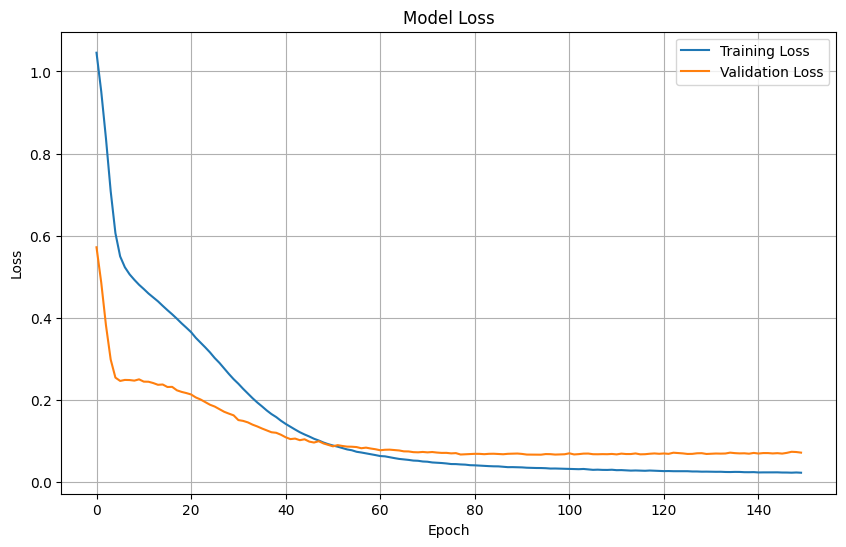

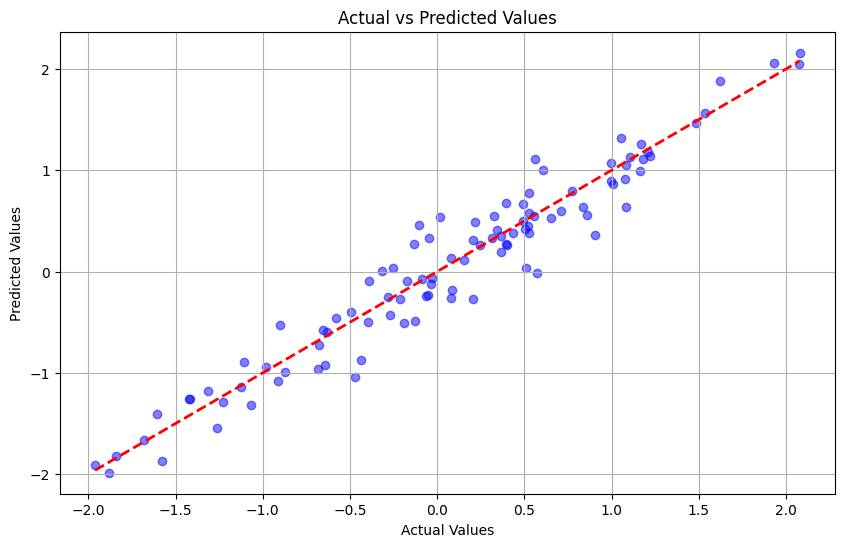

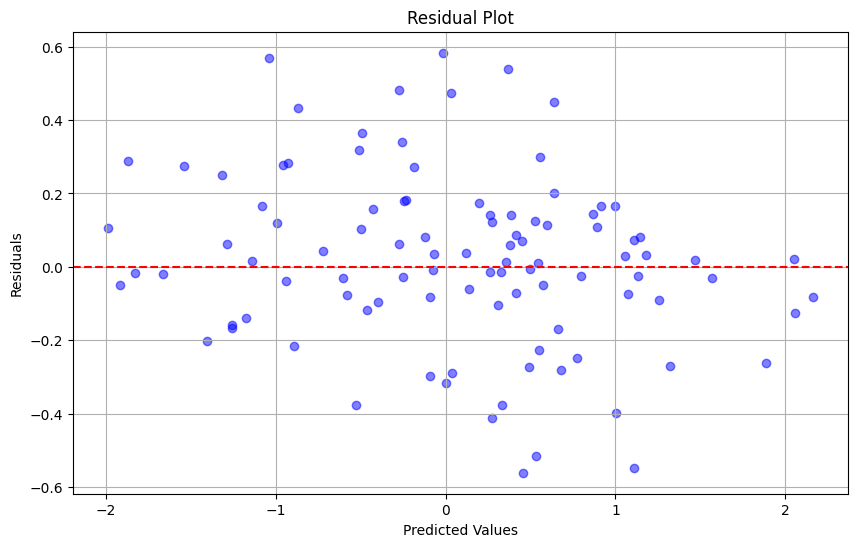

In [13]:
# 🔹 Load dữ liệu từ biến DataFrame đã chia trên Colab
X_train, X_test, y_train, y_test = X_train_vf6, X_test_vf6, y_train_vf6, y_test_vf6

# 🔹 Reshape dữ liệu cho LSTM [samples, time steps, features]
X_train = X_train.values.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.values.reshape(X_test.shape[0], 1, X_test.shape[1])

# 🔹 Hyperparameters
learning_rate = 0.0006
batch_size = 4
num_neurons = 12
epochs = 150

# 🔹 Xây dựng mô hình LSTM
model = Sequential([
    LSTM(num_neurons, activation='relu', input_shape=(1, X_train.shape[2]), return_sequences=True),
    Dense(1)
])

# 🔹 Dùng optimizer Adam
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='mse')

# 🔹 Huấn luyện mô hình và hiển thị đầy đủ loss qua từng epoch
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                    validation_split=0.1, verbose=1)  # 🔥 HIỂN THỊ CHI TIẾT EPOCHS

# 🔹 Dự đoán
train_pred = model.predict(X_train).flatten()
test_pred = model.predict(X_test).flatten()

# 🔹 Tính toán các metrics
def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, mae, r2

train_metrics = calculate_metrics(y_train, train_pred)
test_metrics = calculate_metrics(y_test, test_pred)

print("\nTraining Metrics:")
print(f"MSE: {train_metrics[0]:.4f}, RMSE: {train_metrics[1]:.4f}, MAE: {train_metrics[2]:.4f}, R²: {train_metrics[3]:.4f}")
print("\nTest Metrics:")
print(f"MSE: {test_metrics[0]:.4f}, RMSE: {test_metrics[1]:.4f}, MAE: {test_metrics[2]:.4f}, R²: {test_metrics[3]:.4f}")

# 🔹 Vẽ loss function
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# 🔹 Vẽ biểu đồ Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, test_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

# 🔹 Vẽ biểu đồ Residuals
residuals = y_test - test_pred
plt.figure(figsize=(10, 6))
plt.scatter(test_pred, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

Dùng LSTM dự báo cho 12 tháng

Epoch 1/150


d:\ff\.venv\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.9907 - val_loss: 0.8527
Epoch 2/150
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0228 - val_loss: 0.8069
Epoch 3/150
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9503 - val_loss: 0.7630
Epoch 4/150
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7848 - val_loss: 0.7179
Epoch 5/150
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7906 - val_loss: 0.6759
Epoch 6/150
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7181 - val_loss: 0.6394
Epoch 7/150
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6996 - val_loss: 0.6110
Epoch 8/150
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6960 - val_loss: 0.5931
Epoch 9/150
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6769 - val_loss: 0.5784
Epoch 10/150
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5777 - val_loss: 0.5619
Epoch 11/150
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6142 - val_loss: 0.5509
Epoch 12/150
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5992 - val_lo

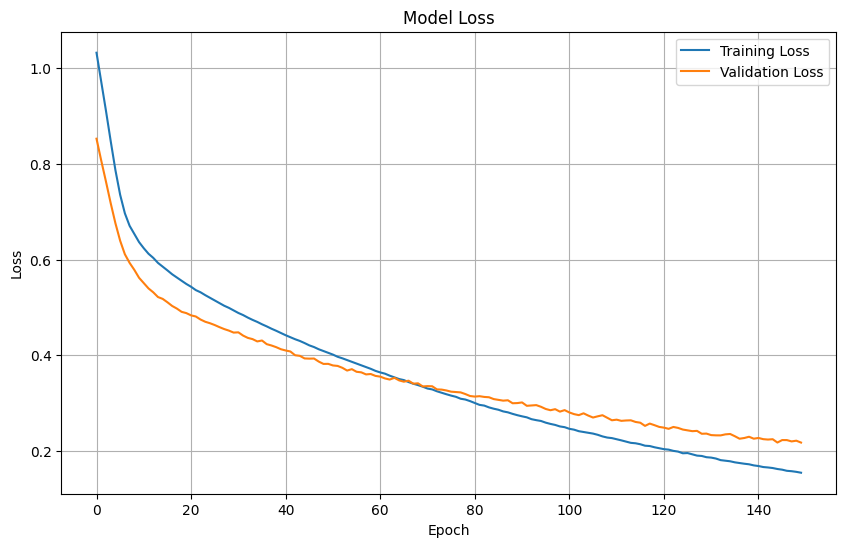

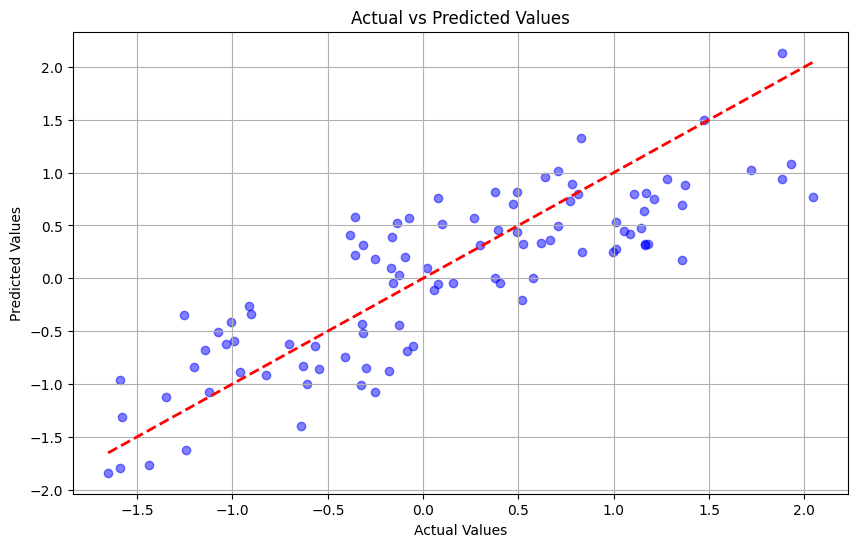

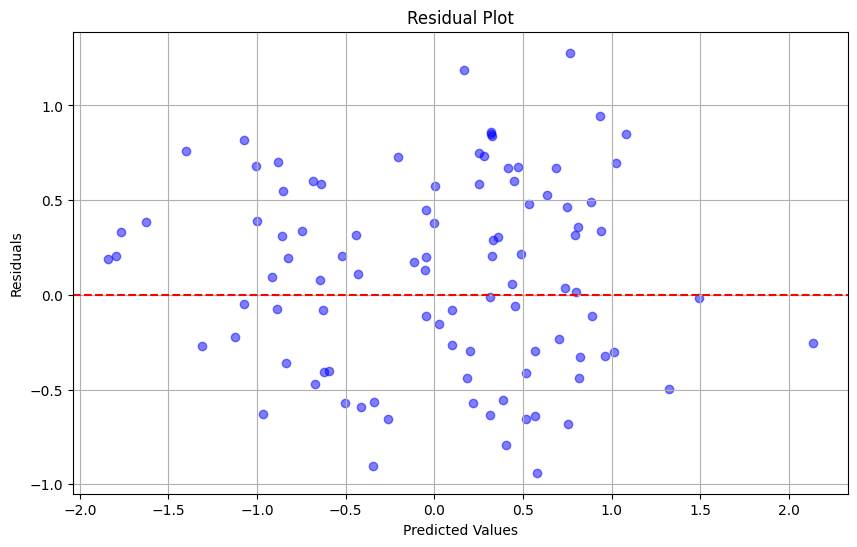

In [14]:
X_train, X_test, y_train, y_test = X_train_vf12, X_test_vf12, y_train_vf12, y_test_vf12

# Reshape dữ liệu cho LSTM [samples, time steps, features]
X_train = X_train.values.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.values.reshape(X_test.shape[0], 1, X_test.shape[1])

# Hyperparameters
learning_rate = 0.0006
batch_size = 4
num_neurons = 12
epochs = 150

# Xây dựng mô hình LSTM
model = Sequential([
    LSTM(num_neurons, activation='relu', input_shape=(1, X_train.shape[2]), return_sequences=True),
    Dense(1)
])

# Dùng optimizer Adam
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='mse')

# Huấn luyện mô hình và hiển thị đầy đủ loss qua từng epoch
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                    validation_split=0.1, verbose=1)  # 🔥 HIỂN THỊ CHI TIẾT EPOCHS

# Dự đoán
train_pred = model.predict(X_train).flatten()
test_pred = model.predict(X_test).flatten()

# Tính toán các metrics
def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, mae, r2

train_metrics = calculate_metrics(y_train, train_pred)
test_metrics = calculate_metrics(y_test, test_pred)

print("\nTraining Metrics:")
print(f"MSE: {train_metrics[0]:.4f}, RMSE: {train_metrics[1]:.4f}, MAE: {train_metrics[2]:.4f}, R²: {train_metrics[3]:.4f}")
print("\nTest Metrics:")
print(f"MSE: {test_metrics[0]:.4f}, RMSE: {test_metrics[1]:.4f}, MAE: {test_metrics[2]:.4f}, R²: {test_metrics[3]:.4f}")

# Vẽ loss function
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Vẽ biểu đồ Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, test_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

# Vẽ biểu đồ Residuals
residuals = y_test - test_pred
plt.figure(figsize=(10, 6))
plt.scatter(test_pred, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

Dùng transformer để dự đoán cho 1 tháng


Epoch 1/150


d:\ff\.venv\lib\site-packages\keras\src\ops\nn.py:908: UserWarning: You are using a softmax over axis 3 of a tensor of shape (4, 2, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 1.1423 - val_loss: 0.3709
Epoch 2/150
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.6958 - val_loss: 0.3714
Epoch 3/150
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.5416 - val_loss: 0.3790
Epoch 4/150
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.4278 - val_loss: 0.3183
Epoch 5/150
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.4428 - val_loss: 0.2910
Epoch 6/150
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.3769 - val_loss: 0.2722
Epoch 7/150
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.3728 - val_loss: 0.2584
Epoch 8/150
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.3350 - val_loss: 0.2635
Epoch 9/150
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.3454 - val_loss: 0.2404
Epoch 10/150
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.3352 - val_loss: 0.2381
Epoch 11/150
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2947 - val_loss: 0.2304
Epoch 12/150
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.3035 - val_

d:\ff\.venv\lib\site-packages\keras\src\ops\nn.py:908: UserWarning: You are using a softmax over axis 3 of a tensor of shape (32, 2, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
d:\ff\.venv\lib\site-packages\keras\src\ops\nn.py:908: UserWarning: You are using a softmax over axis 3 of a tensor of shape (None, 2, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 

Training Metrics:
MSE: 0.0221, RMSE: 0.1487, MAE: 0.1167, R²: 0.9776

Test Metrics:
MSE: 0.0244, RMSE: 0.1563, MAE: 0.1235, R²: 0.9728


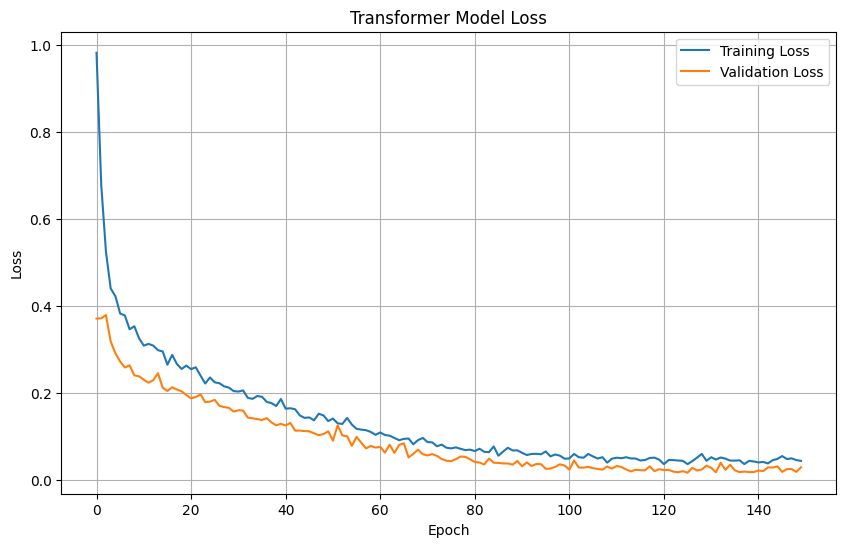

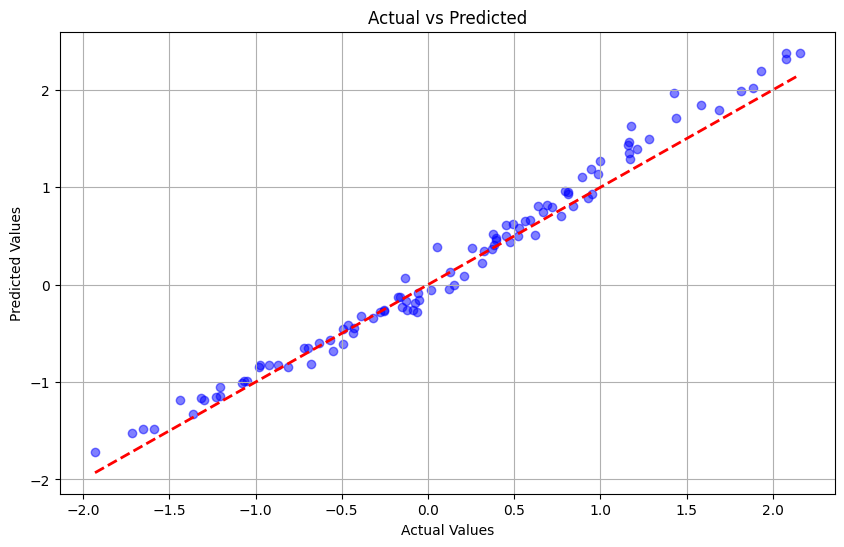

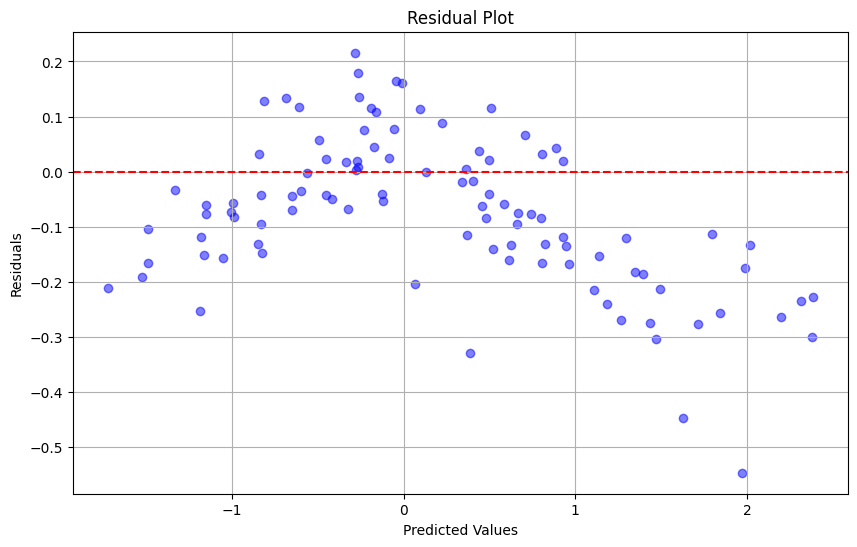

In [15]:
import os
import tensorflow as tf
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.layers import (
    Layer, Input, Dense, Dropout, LayerNormalization,
    MultiHeadAttention, GlobalAveragePooling1D, Add
)
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt

# Tắt các cảnh báo không cần thiết của TensorFlow
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

# Custom Transformer layers
class TimeEmbedding(Layer):
    def __init__(self, d_model, **kwargs):
        super(TimeEmbedding, self).__init__(**kwargs)
        self.d_model = d_model

    def build(self, input_shape):
        self.position_embedding = Dense(self.d_model)

    def call(self, inputs):
        positions = tf.range(start=0, limit=tf.shape(inputs)[1], delta=1, dtype=tf.float32)
        positions = tf.expand_dims(positions, -1)
        embedded = inputs + self.position_embedding(positions)
        return embedded

def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0, l2_reg=0):
    x1 = LayerNormalization(epsilon=1e-6)(inputs)
    attn_output = MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)(x1, x1)
    attn_output = Dropout(dropout)(attn_output)
    out1 = Add()([inputs, attn_output])

    x2 = LayerNormalization(epsilon=1e-6)(out1)
    ffn_output = Dense(ff_dim, activation='relu', kernel_regularizer=l2(l2_reg))(x2)
    ffn_output = Dropout(dropout)(ffn_output)
    ffn_output = Dense(inputs.shape[-1], kernel_regularizer=l2(l2_reg))(ffn_output)

    return Add()([out1, ffn_output])

# Reshape dữ liệu cho Transformer
X_train_vf1 = X_train_vf1.values.reshape(X_train_vf1.shape[0], 1, X_train_vf1.shape[1])
X_test_vf1 = X_test_vf1.values.reshape(X_test_vf1.shape[0], 1, X_test_vf1.shape[1])

# Hàm xây dựng mô hình Transformer
def build_transformer(input_shape, head_size, num_heads, ff_dim, num_transformer_blocks, mlp_units, dropout=0, mlp_dropout=0, l2_reg=0.001):
    inputs = Input(shape=input_shape)
    x = TimeEmbedding(input_shape[-1])(inputs)

    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout, l2_reg)

    x = GlobalAveragePooling1D()(x)

    for dim in mlp_units:
        x = Dense(dim, activation='relu', kernel_regularizer=l2(l2_reg))(x)
        x = Dropout(mlp_dropout)(x)

    outputs = Dense(1)(x)
    return Model(inputs, outputs)

# Thông số mô hình
input_shape = (1, X_train_vf1.shape[2])
head_size = 32
num_heads = 2
ff_dim = 64
num_transformer_blocks = 2
mlp_units = [64]
mlp_dropout = 0.25
dropout = 0.2
l2_reg = 0.001

# Tạo và biên dịch mô hình
model = build_transformer(input_shape, head_size, num_heads, ff_dim, num_transformer_blocks, mlp_units, dropout, mlp_dropout, l2_reg)

model.compile(optimizer="adam", loss="mse")

# Huấn luyện mô hình
history = model.fit(
    X_train_vf1,
    y_train_vf1,
    validation_split=0.2,
    epochs=150,
    batch_size=4,
    verbose=1
)

# Dự đoán
train_pred = model.predict(X_train_vf1).flatten()
test_pred = model.predict(X_test_vf1).flatten()

# Hàm tính toán các chỉ số đánh giá
def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, mae, r2

# In kết quả trên tập huấn luyện
train_metrics = calculate_metrics(y_train_vf1, train_pred)
print("\nTraining Metrics:")
print(f"MSE: {train_metrics[0]:.4f}, RMSE: {train_metrics[1]:.4f}, MAE: {train_metrics[2]:.4f}, R²: {train_metrics[3]:.4f}")

# In kết quả trên tập kiểm tra
test_metrics = calculate_metrics(y_test_vf1, test_pred)
print("\nTest Metrics:")
print(f"MSE: {test_metrics[0]:.4f}, RMSE: {test_metrics[1]:.4f}, MAE: {test_metrics[2]:.4f}, R²: {test_metrics[3]:.4f}")

# Vẽ biểu đồ loss trong quá trình huấn luyện
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Transformer Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Vẽ biểu đồ dự đoán so với thực tế
plt.figure(figsize=(10, 6))
plt.scatter(y_test_vf1, test_pred, color='blue', alpha=0.5)
plt.plot([y_test_vf1.min(), y_test_vf1.max()], [y_test_vf1.min(), y_test_vf1.max()], 'r--', lw=2)
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

# Vẽ biểu đồ residuals
residuals = y_test_vf1 - test_pred
plt.figure(figsize=(10, 6))
plt.scatter(test_pred, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

Dùng Transformer để dự đoán cho 3 tháng

Epoch 1/150


d:\ff\.venv\lib\site-packages\keras\src\ops\nn.py:908: UserWarning: You are using a softmax over axis 3 of a tensor of shape (None, 2, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


78/80 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.5712

d:\ff\.venv\lib\site-packages\keras\src\ops\nn.py:908: UserWarning: You are using a softmax over axis 3 of a tensor of shape (4, 2, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


80/80 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - loss: 1.5551 - val_loss: 0.5316
Epoch 2/150
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.7874 - val_loss: 0.5837
Epoch 3/150
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.6699 - val_loss: 0.4748
Epoch 4/150
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.5766 - val_loss: 0.3820
Epoch 5/150
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.5617 - val_loss: 0.3971
Epoch 6/150
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.4657 - val_loss: 0.3429
Epoch 7/150
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.4664 - val_loss: 0.3023
Epoch 8/150
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.4677 - val_loss: 0.3184
Epoch 9/150
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.4133 - val_loss: 0.2745
Epoch 10/150
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.3871 - val_loss: 0.2786
Epoch 11/150
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.3540 - val_loss: 0.2760
Epoch 12/150
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.3723 - val_l

d:\ff\.venv\lib\site-packages\keras\src\ops\nn.py:908: UserWarning: You are using a softmax over axis 3 of a tensor of shape (32, 2, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 

Training Metrics:
MSE: 0.0301, RMSE: 0.1735, MAE: 0.1414, R²: 0.9696

Test Metrics:
MSE: 0.0464, RMSE: 0.2153, MAE: 0.1839, R²: 0.9494


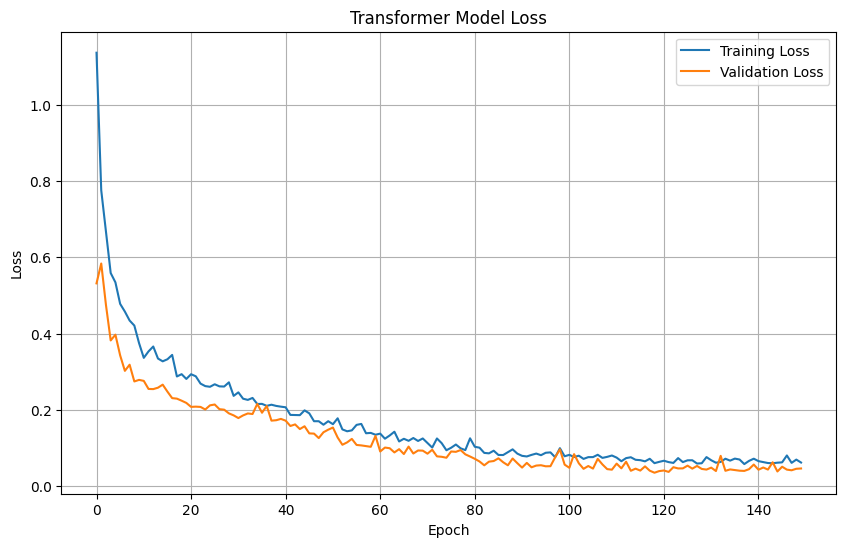

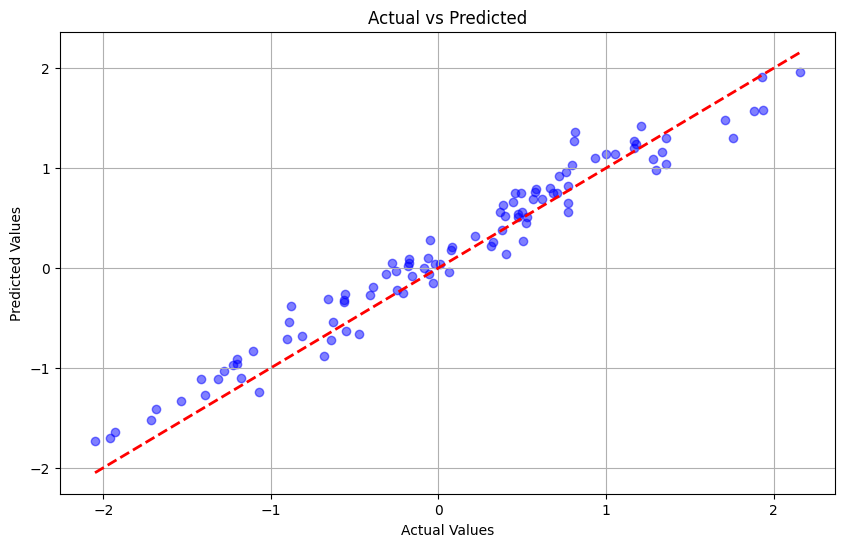

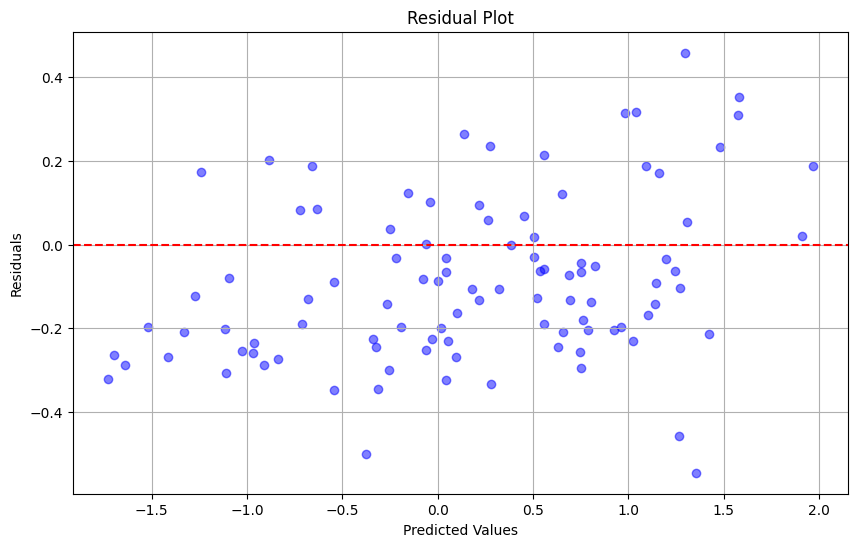

In [16]:
# Tắt các cảnh báo không cần thiết của TensorFlow
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

# Custom Transformer layers
class TimeEmbedding(Layer):
    def __init__(self, d_model, **kwargs):
        super(TimeEmbedding, self).__init__(**kwargs)
        self.d_model = d_model

    def build(self, input_shape):
        self.position_embedding = Dense(self.d_model)

    def call(self, inputs):
        positions = tf.range(start=0, limit=tf.shape(inputs)[1], delta=1, dtype=tf.float32)
        positions = tf.expand_dims(positions, -1)
        embedded = inputs + self.position_embedding(positions)
        return embedded

def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0, l2_reg=0):
    x1 = LayerNormalization(epsilon=1e-6)(inputs)
    attn_output = MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)(x1, x1)
    attn_output = Dropout(dropout)(attn_output)
    out1 = Add()([inputs, attn_output])

    x2 = LayerNormalization(epsilon=1e-6)(out1)
    ffn_output = Dense(ff_dim, activation='relu', kernel_regularizer=l2(l2_reg))(x2)
    ffn_output = Dropout(dropout)(ffn_output)
    ffn_output = Dense(inputs.shape[-1], kernel_regularizer=l2(l2_reg))(ffn_output)

    return Add()([out1, ffn_output])

# Reshape dữ liệu cho Transformer
X_train_vf3 = X_train_vf3.values.reshape(X_train_vf3.shape[0], 1, X_train_vf3.shape[1])
X_test_vf3 = X_test_vf3.values.reshape(X_test_vf3.shape[0], 1, X_test_vf3.shape[1])

# Hàm xây dựng mô hình Transformer
def build_transformer(input_shape, head_size, num_heads, ff_dim, num_transformer_blocks, mlp_units, dropout=0, mlp_dropout=0, l2_reg=0.001):
    inputs = Input(shape=input_shape)
    x = TimeEmbedding(input_shape[-1])(inputs)

    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout, l2_reg)

    x = GlobalAveragePooling1D()(x)

    for dim in mlp_units:
        x = Dense(dim, activation='relu', kernel_regularizer=l2(l2_reg))(x)
        x = Dropout(mlp_dropout)(x)

    outputs = Dense(1)(x)
    return Model(inputs, outputs)

# Thông số mô hình
input_shape = (1, X_train_vf3.shape[2])
head_size = 32
num_heads = 2
ff_dim = 64
num_transformer_blocks = 2
mlp_units = [64]
mlp_dropout = 0.25
dropout = 0.2
l2_reg = 0.001

# Tạo và biên dịch mô hình
model = build_transformer(input_shape, head_size, num_heads, ff_dim, num_transformer_blocks, mlp_units, dropout, mlp_dropout, l2_reg)

model.compile(optimizer="adam", loss="mse")

# Huấn luyện mô hình
history = model.fit(
    X_train_vf3,
    y_train_vf3,
    validation_split=0.2,
    epochs=150,
    batch_size=4,
    verbose=1
)

# Dự đoán
train_pred = model.predict(X_train_vf3).flatten()
test_pred = model.predict(X_test_vf3).flatten()

# Hàm tính toán các chỉ số đánh giá
def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, mae, r2

# In kết quả trên tập huấn luyện
train_metrics = calculate_metrics(y_train_vf3, train_pred)
print("\nTraining Metrics:")
print(f"MSE: {train_metrics[0]:.4f}, RMSE: {train_metrics[1]:.4f}, MAE: {train_metrics[2]:.4f}, R²: {train_metrics[3]:.4f}")

# In kết quả trên tập kiểm tra
test_metrics = calculate_metrics(y_test_vf3, test_pred)
print("\nTest Metrics:")
print(f"MSE: {test_metrics[0]:.4f}, RMSE: {test_metrics[1]:.4f}, MAE: {test_metrics[2]:.4f}, R²: {test_metrics[3]:.4f}")

# Vẽ biểu đồ loss trong quá trình huấn luyện
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Transformer Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Vẽ biểu đồ dự đoán so với thực tế
plt.figure(figsize=(10, 6))
plt.scatter(y_test_vf3, test_pred, color='blue', alpha=0.5)
plt.plot([y_test_vf3.min(), y_test_vf3.max()], [y_test_vf3.min(), y_test_vf3.max()], 'r--', lw=2)
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

# Vẽ biểu đồ residuals
residuals = y_test_vf3 - test_pred
plt.figure(figsize=(10, 6))
plt.scatter(test_pred, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

Dùng Transformer để dự đoán cho 6 tháng

Epoch 1/150


d:\ff\.venv\lib\site-packages\keras\src\ops\nn.py:908: UserWarning: You are using a softmax over axis 3 of a tensor of shape (4, 2, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - loss: 1.4077 - val_loss: 0.6051
Epoch 2/150
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.1332 - val_loss: 0.5164
Epoch 3/150
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.8569 - val_loss: 0.4701
Epoch 4/150
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.7495 - val_loss: 0.4145
Epoch 5/150
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.6126 - val_loss: 0.3365
Epoch 6/150
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.5038 - val_loss: 0.3295
Epoch 7/150
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.5044 - val_loss: 0.3342
Epoch 8/150
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.4623 - val_loss: 0.3777
Epoch 9/150
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.4271 - val_loss: 0.3136
Epoch 10/150
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.4988 - val_loss: 0.2947
Epoch 11/150
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.4268 - val_loss: 0.3487
Epoch 12/150
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.4243 - val_l

d:\ff\.venv\lib\site-packages\keras\src\ops\nn.py:908: UserWarning: You are using a softmax over axis 3 of a tensor of shape (32, 2, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


 1/13 ━━━━━━━━━━━━━━━━━━━━ 3s 296ms/step

d:\ff\.venv\lib\site-packages\keras\src\ops\nn.py:908: UserWarning: You are using a softmax over axis 3 of a tensor of shape (None, 2, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 

Training Metrics:
MSE: 0.0452, RMSE: 0.2127, MAE: 0.1575, R²: 0.9556

Test Metrics:
MSE: 0.0915, RMSE: 0.3025, MAE: 0.2426, R²: 0.8884


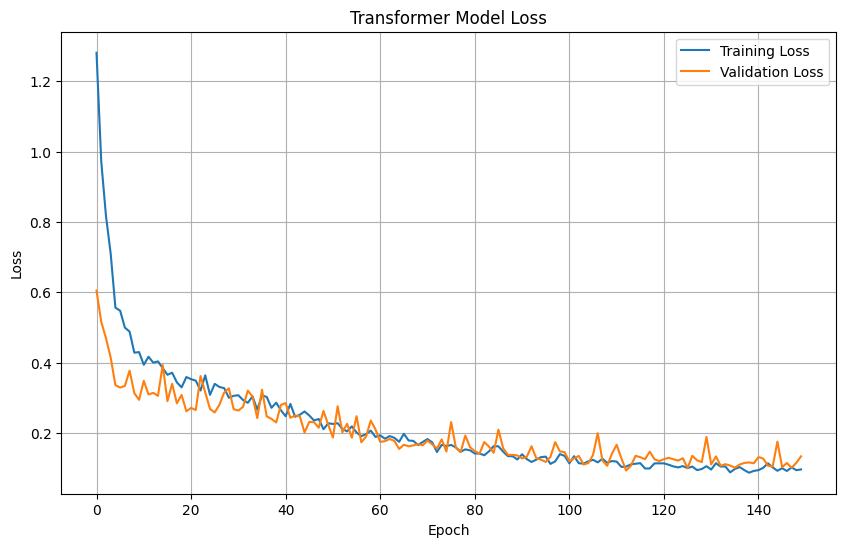

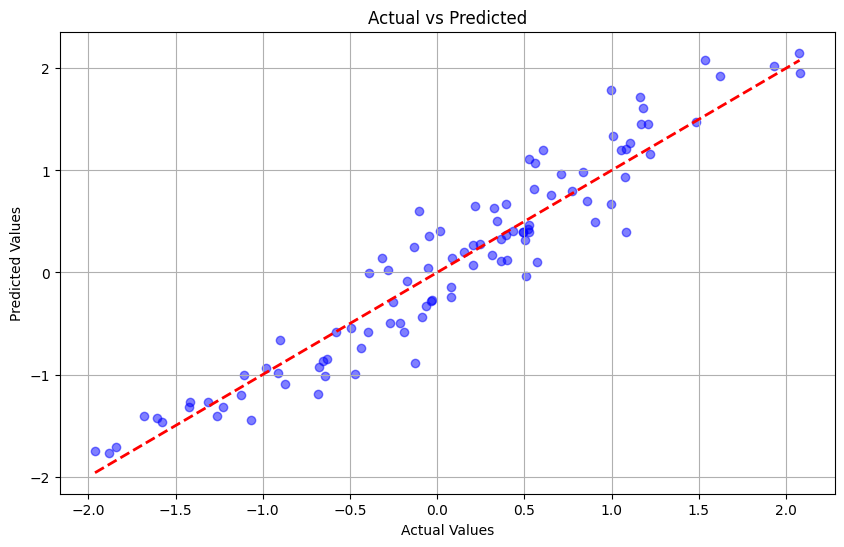

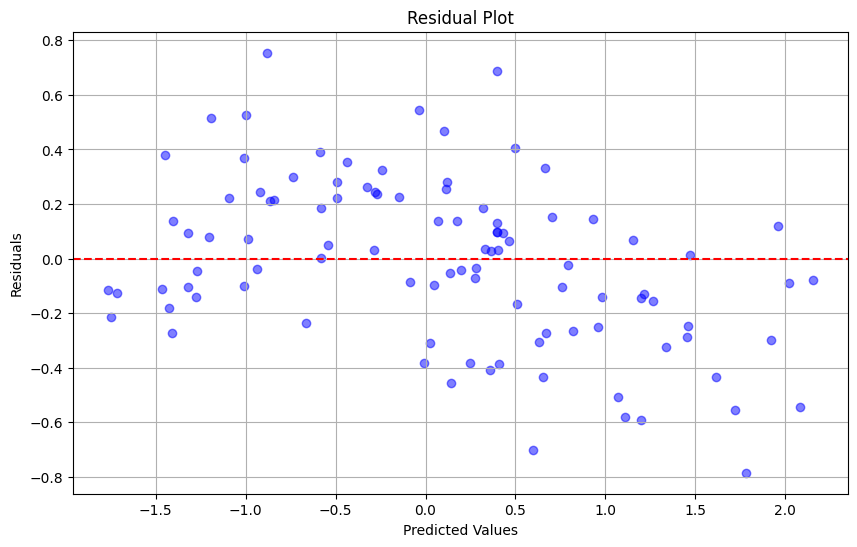

In [17]:
# Tắt các cảnh báo không cần thiết của TensorFlow
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

# Custom Transformer layers
class TimeEmbedding(Layer):
    def __init__(self, d_model, **kwargs):
        super(TimeEmbedding, self).__init__(**kwargs)
        self.d_model = d_model

    def build(self, input_shape):
        self.position_embedding = Dense(self.d_model)

    def call(self, inputs):
        positions = tf.range(start=0, limit=tf.shape(inputs)[1], delta=1, dtype=tf.float32)
        positions = tf.expand_dims(positions, -1)
        embedded = inputs + self.position_embedding(positions)
        return embedded

def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0, l2_reg=0):
    x1 = LayerNormalization(epsilon=1e-6)(inputs)
    attn_output = MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)(x1, x1)
    attn_output = Dropout(dropout)(attn_output)
    out1 = Add()([inputs, attn_output])

    x2 = LayerNormalization(epsilon=1e-6)(out1)
    ffn_output = Dense(ff_dim, activation='relu', kernel_regularizer=l2(l2_reg))(x2)
    ffn_output = Dropout(dropout)(ffn_output)
    ffn_output = Dense(inputs.shape[-1], kernel_regularizer=l2(l2_reg))(ffn_output)

    return Add()([out1, ffn_output])

# Reshape dữ liệu cho Transformer
X_train_vf6 = X_train_vf6.values.reshape(X_train_vf6.shape[0], 1, X_train_vf6.shape[1])
X_test_vf6 = X_test_vf6.values.reshape(X_test_vf6.shape[0], 1, X_test_vf6.shape[1])

# Hàm xây dựng mô hình Transformer
def build_transformer(input_shape, head_size, num_heads, ff_dim, num_transformer_blocks, mlp_units, dropout=0, mlp_dropout=0, l2_reg=0.001):
    inputs = Input(shape=input_shape)
    x = TimeEmbedding(input_shape[-1])(inputs)

    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout, l2_reg)

    x = GlobalAveragePooling1D()(x)

    for dim in mlp_units:
        x = Dense(dim, activation='relu', kernel_regularizer=l2(l2_reg))(x)
        x = Dropout(mlp_dropout)(x)

    outputs = Dense(1)(x)
    return Model(inputs, outputs)

# Thông số mô hình
input_shape = (1, X_train_vf6.shape[2])
head_size = 32
num_heads = 2
ff_dim = 64
num_transformer_blocks = 2
mlp_units = [64]
mlp_dropout = 0.25
dropout = 0.2
l2_reg = 0.001

# Tạo và biên dịch mô hình
model = build_transformer(input_shape, head_size, num_heads, ff_dim, num_transformer_blocks, mlp_units, dropout, mlp_dropout, l2_reg)

model.compile(optimizer="adam", loss="mse")

# Huấn luyện mô hình
history = model.fit(
    X_train_vf6,
    y_train_vf6,
    validation_split=0.2,
    epochs=150,
    batch_size=4,
    verbose=1
)

# Dự đoán
train_pred = model.predict(X_train_vf6).flatten()
test_pred = model.predict(X_test_vf6).flatten()

# Hàm tính toán các chỉ số đánh giá
def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, mae, r2

# In kết quả trên tập huấn luyện
train_metrics = calculate_metrics(y_train_vf6, train_pred)
print("\nTraining Metrics:")
print(f"MSE: {train_metrics[0]:.4f}, RMSE: {train_metrics[1]:.4f}, MAE: {train_metrics[2]:.4f}, R²: {train_metrics[3]:.4f}")

# In kết quả trên tập kiểm tra
test_metrics = calculate_metrics(y_test_vf6, test_pred)
print("\nTest Metrics:")
print(f"MSE: {test_metrics[0]:.4f}, RMSE: {test_metrics[1]:.4f}, MAE: {test_metrics[2]:.4f}, R²: {test_metrics[3]:.4f}")

# Vẽ biểu đồ loss trong quá trình huấn luyện
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Transformer Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Vẽ biểu đồ dự đoán so với thực tế
plt.figure(figsize=(10, 6))
plt.scatter(y_test_vf6, test_pred, color='blue', alpha=0.5)
plt.plot([y_test_vf6.min(), y_test_vf6.max()], [y_test_vf6.min(), y_test_vf6.max()], 'r--', lw=2)
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

# Vẽ biểu đồ residuals
residuals = y_test_vf6 - test_pred
plt.figure(figsize=(10, 6))
plt.scatter(test_pred, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

Dùng transformer để dự báo cho 12 tháng

Epoch 1/150


d:\ff\.venv\lib\site-packages\keras\src\ops\nn.py:908: UserWarning: You are using a softmax over axis 3 of a tensor of shape (None, 2, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


79/79 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - loss: 1.7220 - val_loss: 0.7793
Epoch 2/150
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.1746 - val_loss: 0.7973
Epoch 3/150
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.0523 - val_loss: 0.7940
Epoch 4/150
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.9100 - val_loss: 0.9043
Epoch 5/150
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.8425 - val_loss: 0.7383
Epoch 6/150
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.8359 - val_loss: 0.6409
Epoch 7/150
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.7786 - val_loss: 0.6382
Epoch 8/150
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.8205 - val_loss: 0.6366
Epoch 9/150
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.7494 - val_loss: 0.6804
Epoch 10/150
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.6943 - val_loss: 0.6079
Epoch 11/150
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.6140 - val_loss: 0.5967
Epoch 12/150
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.5598 - val_l

d:\ff\.venv\lib\site-packages\keras\src\ops\nn.py:908: UserWarning: You are using a softmax over axis 3 of a tensor of shape (32, 2, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step

Training Metrics:
MSE: 0.0811, RMSE: 0.2848, MAE: 0.2114, R²: 0.9187

Test Metrics:
MSE: 0.2077, RMSE: 0.4557, MAE: 0.3676, R²: 0.7528


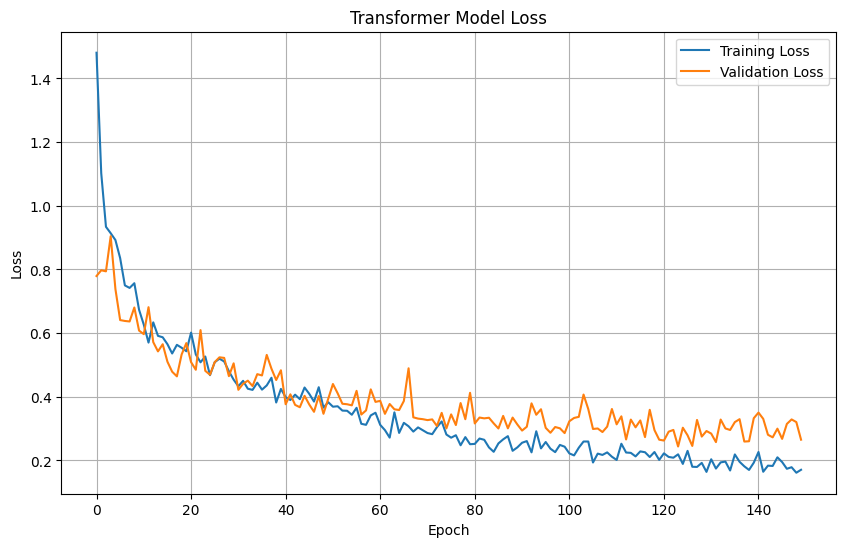

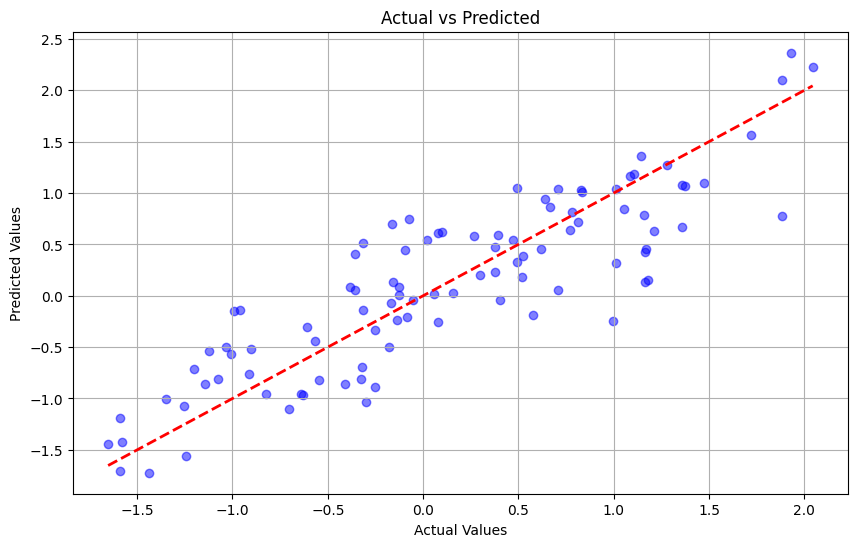

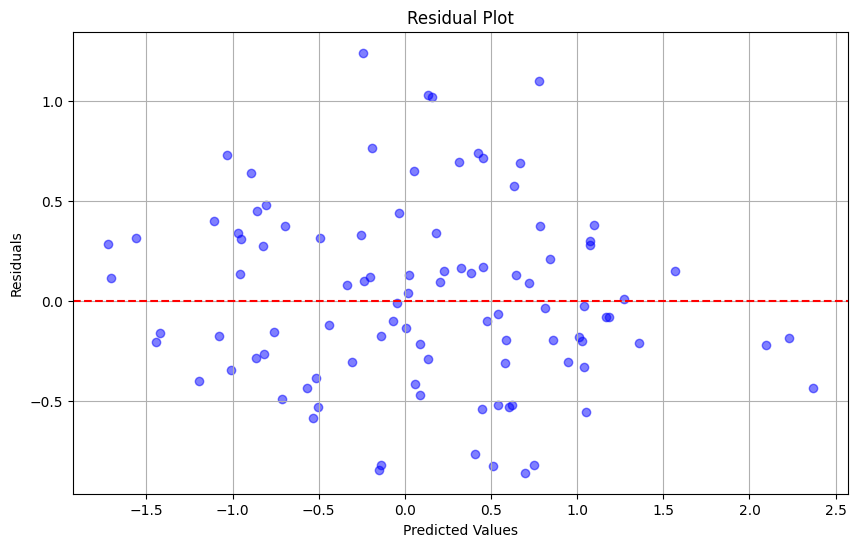

In [18]:
# Tắt các cảnh báo không cần thiết của TensorFlow
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

# Custom Transformer layers
class TimeEmbedding(Layer):
    def __init__(self, d_model, **kwargs):
        super(TimeEmbedding, self).__init__(**kwargs)
        self.d_model = d_model

    def build(self, input_shape):
        self.position_embedding = Dense(self.d_model)

    def call(self, inputs):
        positions = tf.range(start=0, limit=tf.shape(inputs)[1], delta=1, dtype=tf.float32)
        positions = tf.expand_dims(positions, -1)
        embedded = inputs + self.position_embedding(positions)
        return embedded

def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0, l2_reg=0):
    x1 = LayerNormalization(epsilon=1e-6)(inputs)
    attn_output = MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)(x1, x1)
    attn_output = Dropout(dropout)(attn_output)
    out1 = Add()([inputs, attn_output])

    x2 = LayerNormalization(epsilon=1e-6)(out1)
    ffn_output = Dense(ff_dim, activation='relu', kernel_regularizer=l2(l2_reg))(x2)
    ffn_output = Dropout(dropout)(ffn_output)
    ffn_output = Dense(inputs.shape[-1], kernel_regularizer=l2(l2_reg))(ffn_output)

    return Add()([out1, ffn_output])

# Reshape dữ liệu cho Transformer
X_train_vf12 = X_train_vf12.values.reshape(X_train_vf12.shape[0], 1, X_train_vf12.shape[1])
X_test_vf12 = X_test_vf12.values.reshape(X_test_vf12.shape[0], 1, X_test_vf12.shape[1])

# Hàm xây dựng mô hình Transformer
def build_transformer(input_shape, head_size, num_heads, ff_dim, num_transformer_blocks, mlp_units, dropout=0, mlp_dropout=0, l2_reg=0.001):
    inputs = Input(shape=input_shape)
    x = TimeEmbedding(input_shape[-1])(inputs)

    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout, l2_reg)

    x = GlobalAveragePooling1D()(x)

    for dim in mlp_units:
        x = Dense(dim, activation='relu', kernel_regularizer=l2(l2_reg))(x)
        x = Dropout(mlp_dropout)(x)

    outputs = Dense(1)(x)
    return Model(inputs, outputs)

# Thông số mô hình
input_shape = (1, X_train_vf12.shape[2])
head_size = 32
num_heads = 2
ff_dim = 64
num_transformer_blocks = 2
mlp_units = [64]
mlp_dropout = 0.25
dropout = 0.2
l2_reg = 0.001

# Tạo và biên dịch mô hình
model = build_transformer(input_shape, head_size, num_heads, ff_dim, num_transformer_blocks, mlp_units, dropout, mlp_dropout, l2_reg)

model.compile(optimizer="adam", loss="mse")

# Huấn luyện mô hình
history = model.fit(
    X_train_vf12,
    y_train_vf12,
    validation_split=0.2,
    epochs=150,
    batch_size=4,
    verbose=1
)

# Dự đoán
train_pred = model.predict(X_train_vf12).flatten()
test_pred = model.predict(X_test_vf12).flatten()

# Hàm tính toán các chỉ số đánh giá
def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, mae, r2

# In kết quả trên tập huấn luyện
train_metrics = calculate_metrics(y_train_vf12, train_pred)
print("\nTraining Metrics:")
print(f"MSE: {train_metrics[0]:.4f}, RMSE: {train_metrics[1]:.4f}, MAE: {train_metrics[2]:.4f}, R²: {train_metrics[3]:.4f}")

# In kết quả trên tập kiểm tra
test_metrics = calculate_metrics(y_test_vf12, test_pred)
print("\nTest Metrics:")
print(f"MSE: {test_metrics[0]:.4f}, RMSE: {test_metrics[1]:.4f}, MAE: {test_metrics[2]:.4f}, R²: {test_metrics[3]:.4f}")

# Vẽ biểu đồ loss trong quá trình huấn luyện
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Transformer Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Vẽ biểu đồ dự đoán so với thực tế
plt.figure(figsize=(10, 6))
plt.scatter(y_test_vf12, test_pred, color='blue', alpha=0.5)
plt.plot([y_test_vf12.min(), y_test_vf12.max()], [y_test_vf12.min(), y_test_vf12.max()], 'r--', lw=2)
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

# Vẽ biểu đồ residuals
residuals = y_test_vf12 - test_pred
plt.figure(figsize=(10, 6))
plt.scatter(test_pred, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()